# Imports

In [1]:
import pandas as pd
import numpy as np
import torch
from sklearn import metrics
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import ConfusionMatrixDisplay
import glob
import matplotlib.image as mpimg
from IPython.display import Image, display
import csv
import cv2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from IPython.display import display_html
from itertools import chain,cycle
import graphviz

# Path list

In [2]:
path = '../data/Yoga-82/'

path3 = '../Results/Results/B/dense201_hirar_new/'
path2 = '../Results/Results/B/dense201_hirar_6same20/'
path1 = '../Results/Results/B/dense201_hirar/'

# Label dictionaries

In [3]:
trans82 = {'18':'Eagle',
'68':'Tree',
'8':'Chair',
'60':'Standing',
'77':'Wide legged forward bend',
'16':'Dolphin',
'17':'Downward dog',
'36':'Intese side stretch',
'31':'Half moon',
'22':'Extended triangle',
'21':'Extended side angle',
'29':'Gate',
'75':'Warrior I',
'81':'ReverseWarrior',
'40':'Low lunges',
'74':'Warrior II',
'73':'Warrior III',
'39':'Lord of dance',
'62':'Standing big-toe hold',
'61':'Standing split',
'57':'Easy sitting',
'3':'Cobbler',
'28':'Garland',
'59':'Staff',
'41':'Noose',
'13':'Cow face',
'72':'Hero and thunderbolt',
'1':'Bhardwajas twist',
'30':'Half lord of the fishes',
'58':'Split',
'76':'Wide angle seated forward bend',
'34':'Head to knee',
'49':'Revolvedhead-toknee',
'52':'Seated forward bend',
'67':'Tortoise pose',
'0':'Shooting bow',
'35':'Heron',
'47':'King pigeon',
'14':'Cranecrow',
'53':'Shoulder pressing',
'11':'Cockerel',
'50':'Scale',
'24':'Firefly',
'55':'Side crane-crow',
'19':'Eight angle',
'46':'Sage Koundaniya',
'32':'Handstand',
'63':'Headstand',
'64':'Shoulderstand',
'23':'Feather peacock',
'37':'Legs up to wall',
'45':'Plow',
'51':'Scorpion',
'12':'Corpse',
'25':'Fish',
'33':'Happy baby',
'48':'Reclining hand-to-big-toe',
'79':'Wind relieving',
'65':'Reclining cobbler',
'66':'Reclining hero',
'80':'Yogic sleep',
'10':'Cobra',
'27':'Frog',
'38':'Locust',
'9':'Child',
'20':'Extended puppy',
'54':'Side reclining leg lift',
'56':'Side plank',
'15':'Dolphin plank',
'26':'Low plank (four limbedstaff)',
'44':'Plank',
'42':'Peacock',
'69':'Upward bow',
'70':'Upward facing two- foot staff',
'71':'Upward plank',
'43':'Pigeon',
'5':'Bridge',
'78':'Wild things',
'6':'Camel',
'7':'Cat-cow',
'2':' Boat',
'4':' Bow'}
#trans2 = {(str(int(key) - 1)):v for key,v in trans.items()}
trans82 = {int(k):str(v) for k,v in trans82.items()}
trans82_x = sorted(trans82.items())
#for key, value in sorted(trans82.items()): # Note the () after items!
 #   print(key, value)

In [4]:
trans20 = { '0': 'staright', '1': 'forward bend', '2': 'side bend', '3': 'others', '4': 'frontleg', '5': 'behindleg', 
         '6': 'split', '7': 'ffw bend', '8': 'twist', '9': 'front', '10': 'side', 
        '11': 'legs up', '12': 'legs bend', '13': 'up-facing', '14': 'down-facing', '15': 'side-facing', 
         '16': 'plank balance', '17': 'up-facing', '18': 'down-facing', '19': 'others'}
trans20 = {int(k):str(v) for k,v in trans20.items()}
trans20_x = sorted(trans20.items())

In [5]:
trans6 = {'0': 'standing', '1': 'sitting', '2': 'balancing', '3': 'inverted', '4': 'reclining', '5': 'wheel'}
trans6 = {int(k):str(v) for k,v in trans6.items()}
trans6_x = sorted(trans6.items())

# Load data

In [7]:
Train_df = pd.read_csv(path + 'PerfectTrainBalanced_df.csv')

Test_df = pd.read_csv(path + 'PerfectTestBalanced_df.csv')

Train_df.shape, Test_df.shape

((5854, 7), (2509, 7))

# Load logs

In [8]:
logV1_df = pd.read_csv(path1 + 'log_V1.csv')
logV1_df = logV1_df.rename(columns={"val_dense_accuracy": "val acc - 6 classes", "val_dense_2_accuracy": "val acc - 82 classes", "val_dense_1_accuracy": "val acc - 20 classes"})
logV1_df = logV1_df.rename(columns={"dense_accuracy": "train acc - 6 classes", "dense_2_accuracy": "train acc - 82 classes", "dense_1_accuracy": "train acc - 20 classes"})
logV1_df = logV1_df.rename(columns={"val_dense_loss": "val loss - 6 classes", "val_dense_2_loss": "val loss - 82 classes", "val_dense_1_loss": "val loss - 20 classes"})
logV1_df = logV1_df.rename(columns={"dense_loss": "train loss - 6 classes", "dense_2_loss": "train loss - 82 classes", "dense_1_loss": "train loss - 20 classes"})
#logV1_df.tail()

In [9]:
logV2_df = pd.read_csv(path2 + 'log_V2.csv')
logV2_df = logV2_df.rename(columns={"val_dense_accuracy": "val acc - 6 classes", "val_dense_2_accuracy": "val acc - 82 classes", "val_dense_1_accuracy": "val acc - 20 classes"})
logV2_df = logV2_df.rename(columns={"dense_accuracy": "train acc - 6 classes", "dense_2_accuracy": "train acc - 82 classes", "dense_1_accuracy": "train acc - 20 classes"})
logV2_df = logV2_df.rename(columns={"val_dense_loss": "val loss - 6 classes", "val_dense_2_loss": "val loss - 82 classes", "val_dense_1_loss": "val loss - 20 classes"})
logV2_df = logV2_df.rename(columns={"dense_loss": "train loss - 6 classes", "dense_2_loss": "train loss - 82 classes", "dense_1_loss": "train loss - 20 classes"})
#logV2_df.tail()

In [11]:
logV3_df = pd.read_csv(path3 + 'log_try.csv')
logV3_df = logV3_df.rename(columns={"val_dense_accuracy": "val acc - 6 classes", "val_dense_2_accuracy": "val acc - 82 classes", "val_dense_1_accuracy": "val acc - 20 classes"})
logV3_df = logV3_df.rename(columns={"dense_accuracy": "train acc - 6 classes", "dense_2_accuracy": "train acc - 82 classes", "dense_1_accuracy": "train acc - 20 classes"})
logV3_df = logV3_df.rename(columns={"val_dense_loss": "val loss - 6 classes", "val_dense_2_loss": "val loss - 82 classes", "val_dense_1_loss": "val loss - 20 classes"})
logV3_df = logV3_df.rename(columns={"dense_loss": "train loss - 6 classes", "dense_2_loss": "train loss - 82 classes", "dense_1_loss": "train loss - 20 classes"})
#logV3_df.tail()

## ACCURACY

In [12]:
print('DenseNet Variant 1 Accuracy')
print('----------------------------')
print(logV1_df[["train acc - 6 classes", "train acc - 20 classes", "train acc - 82 classes", "val acc - 6 classes", "val acc - 20 classes", "val acc - 82 classes"]].iloc[-1])
print()
print('DenseNet Variant 2 Accuracy')
print('----------------------------')
print(logV2_df[["train acc - 6 classes", "train acc - 20 classes", "train acc - 82 classes", "val acc - 6 classes", "val acc - 20 classes", "val acc - 82 classes"]].iloc[-1])
print()
print('DenseNet Variant 3 Accuracy')
print('----------------------------')
print(logV3_df[["train acc - 6 classes", "train acc - 20 classes", "train acc - 82 classes", "val acc - 6 classes", "val acc - 20 classes", "val acc - 82 classes"]].iloc[-1])
print()

DenseNet Variant 1 Accuracy
----------------------------
train acc - 6 classes     0.315340
train acc - 20 classes    0.898531
train acc - 82 classes    0.934404
val acc - 6 classes       0.303308
val acc - 20 classes      0.060183
val acc - 82 classes      0.041849
Name: 35, dtype: float64

DenseNet Variant 2 Accuracy
----------------------------
train acc - 6 classes     0.907755
train acc - 20 classes    0.894602
train acc - 82 classes    0.931158
val acc - 6 classes       0.174173
val acc - 20 classes      0.047031
val acc - 82 classes      0.037465
Name: 35, dtype: float64

DenseNet Variant 3 Accuracy
----------------------------
train acc - 6 classes     0.810386
train acc - 20 classes    0.922617
train acc - 82 classes    0.953365
val acc - 6 classes       0.198087
val acc - 20 classes      0.061778
val acc - 82 classes      0.036269
Name: 35, dtype: float64



Text(0, 0.5, 'loss')

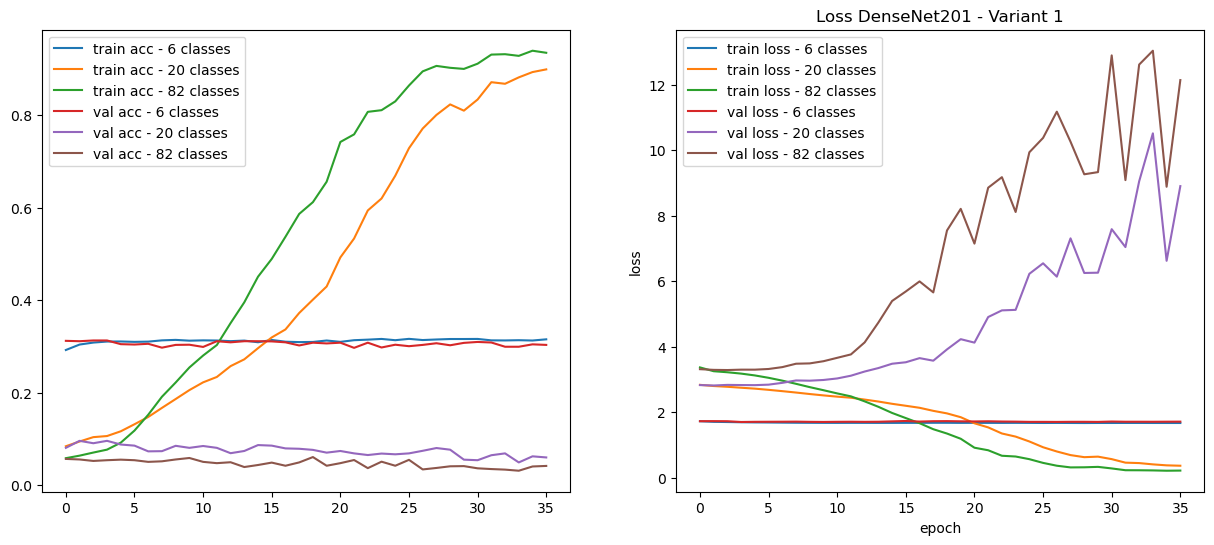

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2)

logV1_df[["train acc - 6 classes", "train acc - 20 classes", "train acc - 82 classes", "val acc - 6 classes", "val acc - 20 classes", "val acc - 82 classes"]].plot.line(ax=axes[0], figsize=(15,6))
plt.title('Accuracy DenseNet201 - Variant 1')
plt.xlabel('epoch')
plt.ylabel('accuracy')

logV1_df[["train loss - 6 classes", "train loss - 20 classes", "train loss - 82 classes", "val loss - 6 classes", "val loss - 20 classes", "val loss - 82 classes"]].plot.line(ax=axes[1])
plt.title('Loss DenseNet201 - Variant 1')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

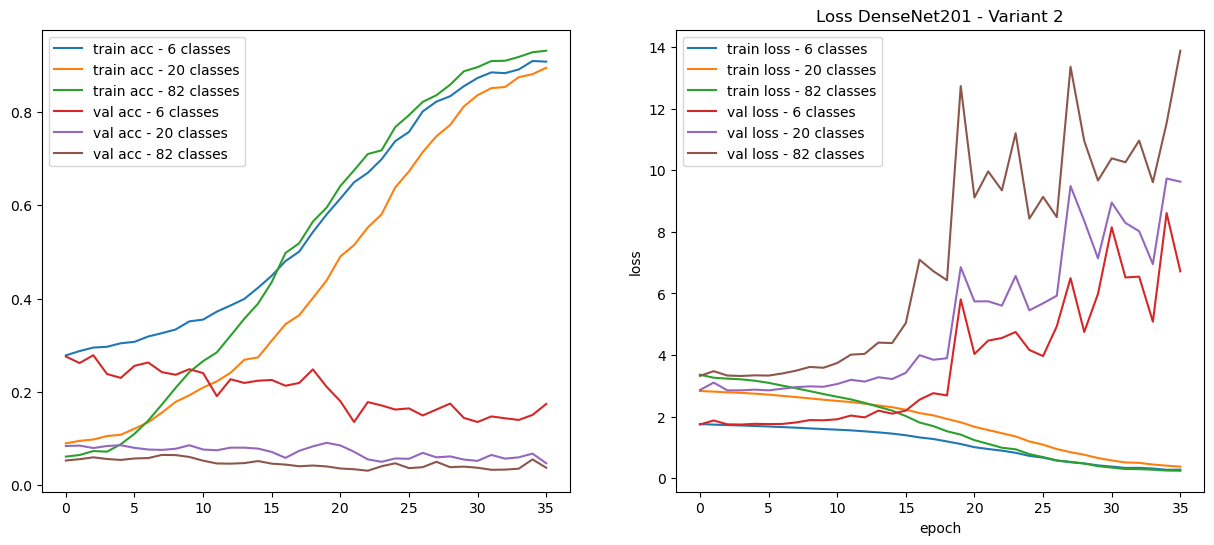

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2)

logV2_df[["train acc - 6 classes", "train acc - 20 classes", "train acc - 82 classes", "val acc - 6 classes", "val acc - 20 classes", "val acc - 82 classes"]].plot.line(ax=axes[0], figsize=(15,6))
plt.title('Accuracy DenseNet201 - Variant 2')
plt.xlabel('epoch')
plt.ylabel('accuracy')

logV2_df[["train loss - 6 classes", "train loss - 20 classes", "train loss - 82 classes", "val loss - 6 classes", "val loss - 20 classes", "val loss - 82 classes"]].plot.line(ax=axes[1], figsize=(15,6))
plt.title('Loss DenseNet201 - Variant 2')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

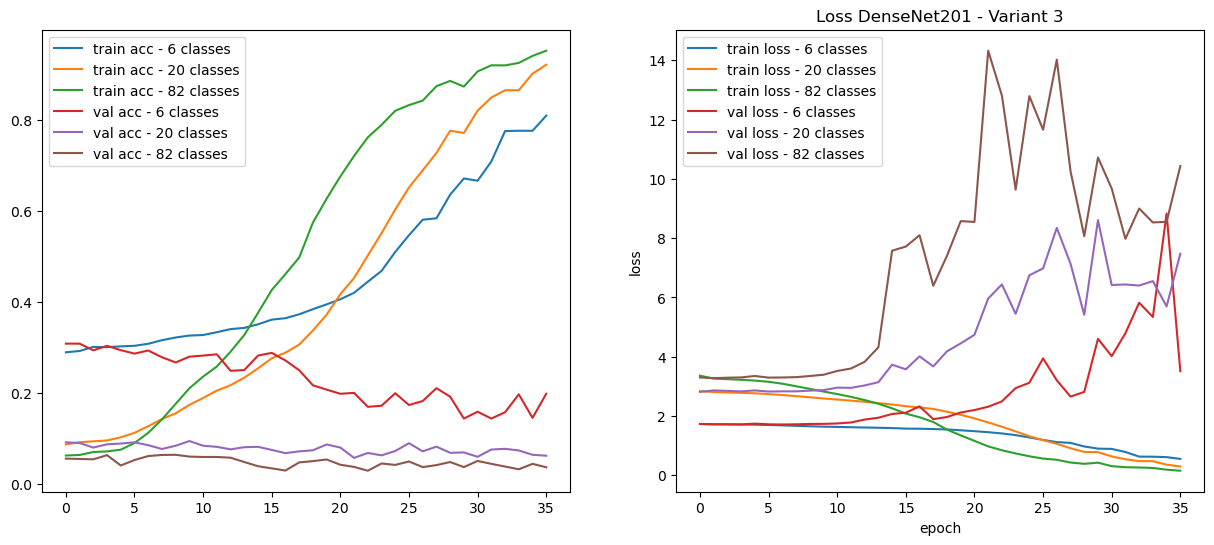

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2)

logV3_df[["train acc - 6 classes", "train acc - 20 classes", "train acc - 82 classes", "val acc - 6 classes", "val acc - 20 classes", "val acc - 82 classes"]].plot.line(ax=axes[0], figsize=(15,6))
plt.title('Accuracy DenseNet201 - Variant 3')
plt.xlabel('epoch')
plt.ylabel('accuracy')

logV3_df[["train loss - 6 classes", "train loss - 20 classes", "train loss - 82 classes", "val loss - 6 classes", "val loss - 20 classes", "val loss - 82 classes"]].plot.line(ax=axes[1])
plt.title('Loss DenseNet201 - Variant 3')
plt.xlabel('epoch')
plt.ylabel('loss')

# Load probabilities

In [19]:
#arrays
probabilities_V1 = np.loadtxt(path1 + 'probabilities6_V1.txt', dtype=int)
probabilities_V2 = np.loadtxt(path2 + 'probabilities6_V1.txt', dtype=int)
probabilities_V3 = np.loadtxt(path3 + 'probabilities6_V1.txt', dtype=int)

# Load predictions

In [20]:
#arrays
predictions6_V1 = np.loadtxt(path1 + 'predictions6.txt', dtype=int)
predictions20_V1 = np.loadtxt(path1 + 'predictions20.txt', dtype=int)
predictions82_V1 = np.loadtxt(path1 + 'predictions82.txt', dtype=int)

predictions6_V2 = np.loadtxt(path2 + 'predictions6.txt', dtype=int)
predictions20_V2 = np.loadtxt(path2 + 'predictions20.txt', dtype=int)
predictions82_V2 = np.loadtxt(path2 + 'predictions82.txt', dtype=int)

predictions6_V3 = np.loadtxt(path3 + 'predictions6.txt', dtype=int)
predictions20_V3 = np.loadtxt(path3 + 'predictions20.txt', dtype=int)
predictions82_V3 = np.loadtxt(path3 + 'predictions82.txt', dtype=int)

#### check accuracy

In [21]:
true6_V2 = Test_df['label of class_6'].to_numpy()
accuracy_score(predictions6_V2, true6_V2, normalize=True)

0.18294141092068553

In [22]:
true20_V2 = Test_df['label of class_20'].to_numpy()
accuracy_score(predictions20_V2, true20_V2, normalize=True)

0.04902351534475887

In [23]:
true82_V2 = Test_df['label of class_82'].to_numpy()
accuracy_score(predictions82_V2, true82_V2, normalize=True)

0.006775607811877242

# Classification reports by levels

In [24]:
def correctLabels_82(classification_report):
    classification_report = classification_report.reset_index(drop=True)
    classification_report['index1'] = classification_report.index
    classification_report = classification_report.replace({"index1": trans82})
    classification_report.iloc[-3:, classification_report.columns.get_loc('index1')] = ['accuracy', 'macro avg', 'weighted avg']
    classification_report = classification_report.set_index('index1')
    return classification_report

In [27]:
#class report as pandas df
def class_report(path):
    report= pd.read_csv(path).T
    report.columns = report.iloc[0]
    report.drop(index=report.index[0], axis=0, inplace=True)
    report.columns.name = None

    return report

def plotClassReport(df):
    
    df['support'] = df.support.apply(int)

    styles = [dict(selector="caption", props=[("text-align", "center"),
                                              ("font-size", "120%"),
                                              ("font-weight", "bold"),
                                             ("color", 'black')])]
    return df.style.background_gradient(cmap='viridis',subset=pd.IndexSlice[:, :'f1-score']).set_caption("Classification Report").set_table_styles(styles)
    

def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

classification_report6_V1 = class_report(path1 + 'classification_report6.csv')
classification_report20_V1 = class_report(path1 + 'classification_report20.csv')
classification_report82_V1 = correctLabels_82(class_report(path1 + 'classification_report82.csv'))

classification_report6_V2 = class_report(path2 + 'classification_report6.csv')
classification_report20_V2 = class_report(path2 + 'classification_report20.csv')
classification_report82_V2 = correctLabels_82(class_report(path2 + 'classification_report82.csv'))

classification_report6_V3 = class_report(path3 + 'classification_report6.csv')
classification_report20_V3 = class_report(path3 + 'classification_report20.csv')
classification_report82_V3 = correctLabels_82(class_report(path3 + 'classification_report82.csv'))


def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

def getAcc(df):
    acc = df._get_value('accuracy', 'precision')
    f1 = df._get_value('weighted avg', 'f1-score')
    print(namestr(df, globals()))
    print('-----------------------------')
    print('Accuracy: ', round(acc, 3), '\nF1 SCORE: ', round(f1, 3))
    print()

print('')
print('____________________________________________________')
print('******** VARIANT 1 ********')
getAcc(classification_report6_V1)
getAcc(classification_report20_V1)
getAcc(classification_report82_V1)

print('')
print('____________________________________________________')
print('******** VARIANT 2 ********')
getAcc(classification_report6_V2)
getAcc(classification_report20_V2)
getAcc(classification_report82_V2)

print('')
print('____________________________________________________')
print('******** VARIANT 3 ********')
getAcc(classification_report6_V3)
getAcc(classification_report20_V3)
getAcc(classification_report82_V3)


____________________________________________________
******** VARIANT 1 ********
['classification_report6_V1']
-----------------------------
Accuracy:  0.224 
F1 SCORE:  0.099

['classification_report20_V1']
-----------------------------
Accuracy:  0.05 
F1 SCORE:  0.03

['classification_report82_V1']
-----------------------------
Accuracy:  0.014 
F1 SCORE:  0.002


____________________________________________________
******** VARIANT 2 ********
['classification_report6_V2']
-----------------------------
Accuracy:  0.183 
F1 SCORE:  0.133

['classification_report20_V2']
-----------------------------
Accuracy:  0.049 
F1 SCORE:  0.031

['classification_report82_V2']
-----------------------------
Accuracy:  0.007 
F1 SCORE:  0.002


____________________________________________________
******** VARIANT 3 ********
['classification_report6_V3']
-----------------------------
Accuracy:  0.192 
F1 SCORE:  0.165

['classification_report20_V3']
-----------------------------
Accuracy:  0.061 
F

In [28]:
display_side_by_side(plotClassReport(classification_report6_V1),plotClassReport(classification_report20_V1),plotClassReport(classification_report82_V1), titles=['Version 1 - 6 classes','Version 1 - 20 classes', 'Version 1 - 82 classes'])

Version 1 - 6 classes 
 
 Classification Report 
 
 
   
 precision 
 recall 
 f1-score 
 support 
 
 
 
 
 standing 
 0.258065 
 0.036309 
 0.063660 
 661 
 
 
 sitting 
 0.000000 
 0.000000 
 0.000000 
 503 
 
 
 inverted 
 0.000000 
 0.000000 
 0.000000 
 261 
 
 
 reclining 
 0.071429 
 0.004425 
 0.008333 
 226 
 
 
 wheel 
 0.224217 
 0.948763 
 0.362715 
 566 
 
 
 balancing 
 0.000000 
 0.000000 
 0.000000 
 292 
 
 
 accuracy 
 0.223994 
 0.223994 
 0.223994 
 0 
 
 
 macro avg 
 0.092285 
 0.164916 
 0.072452 
 2509 
 
 
 weighted avg 
 0.125002 
 0.223994 
 0.099346 
 2509 
 
 
 
 Version 1 - 20 classes 
 
 Classification Report 
 
 
   
 precision 
 recall 
 f1-score 
 support 
 
 
 
 
 staright 
 0.000000 
 0.000000 
 0.000000 
 104 
 
 
 forward bend 
 0.064465 
 0.305970 
 0.106494 
 134 
 
 
 side bend 
 0.142857 
 0.061151 
 0.085642 
 278 
 
 
 others 
 0.000000 
 0.000000 
 0.000000 
 56 
 
 
 fronleg 
 0.036765 
 0.036765 
 0.036765 
 136 
 
 
 behindleg 
 0.000000 
 0.000000 
 0.000000 
 128 
 
 
 split 
 0.000000 
 0.000000 
 0.000000 
 71 
 
 
 ffw bend 
 0.000000 
 0.000000 
 0.000000 
 113 
 
 
 twist 
 0.000000 
 0.000000 
 0.000000 
 55 
 
 
 front 
 0.049002 
 0.171975 
 0.076271 
 157 
 
 
 side 
 0.166667 
 0.009615 
 0.018182 
 104 
 
 
 legs straight up 
 0.066667 
 0.032258 
 0.043478 
 155 
 
 
 legs bend 
 0.028090 
 0.352113 
 0.052029 
 71 
 
 
 up-facing 
 0.097561 
 0.019608 
 0.032653 
 204 
 
 
 down-facing 
 0.000000 
 0.000000 
 0.000000 
 32 
 
 
 side-facing 
 0.000000 
 0.000000 
 0.000000 
 56 
 
 
 plank balance 
 0.000000 
 0.000000 
 0.000000 
 72 
 
 
 accuracy 
 0.050219 
 0.050219 
 0.050219 
 0 
 
 
 macro avg 
 0.039747 
 0.049714 
 0.023043 
 2509 
 
 
 weighted avg 
 0.055871 
 0.050219 
 0.030280 
 2509 
 
 
 
 Version 1 - 82 classes 
 
 Classification Report 
 
 
   
 precision 
 recall 
 f1-score 
 support 
 
 
 index1 
   
   
   
   
 
 
 
 
 Shooting bow 
 0.000000 
 0.000000 
 0.000000 
 14 
 
 
 Bhardwajas twist 
 0.000000 
 0.000000 
 0.000000 
 16 
 
 
 Boat 
 0.000000 
 0.000000 
 0.000000 
 27 
 
 
 Cobbler 
 0.000000 
 0.000000 
 0.000000 
 28 
 
 
 Bow 
 0.000000 
 0.000000 
 0.000000 
 29 
 
 
 Bridge 
 0.000000 
 0.000000 
 0.000000 
 36 
 
 
 Camel 
 0.000000 
 0.000000 
 0.000000 
 39 
 
 
 Cat-cow 
 0.000000 
 0.000000 
 0.000000 
 32 
 
 
 Chair 
 0.000000 
 0.000000 
 0.000000 
 33 
 
 
 Child 
 0.000000 
 0.000000 
 0.000000 
 39 
 
 
 Cobra 
 0.000000 
 0.000000 
 0.000000 
 95 
 
 
 Cockerel 
 0.000000 
 0.000000 
 0.000000 
 31 
 
 
 Corpse 
 0.000000 
 0.000000 
 0.000000 
 29 
 
 
 Cow face 
 0.000000 
 0.000000 
 0.000000 
 40 
 
 
 Cranecrow 
 0.000000 
 0.000000 
 0.000000 
 40 
 
 
 Dolphin plank 
 0.000000 
 0.000000 
 0.000000 
 10 
 
 
 Dolphin 
 0.000000 
 0.000000 
 0.000000 
 9 
 
 
 Downward dog 
 0.017143 
 0.214286 
 0.031746 
 28 
 
 
 Eagle 
 0.000000 
 0.000000 
 0.000000 
 40 
 
 
 Eight angle 
 0.000000 
 0.000000 
 0.000000 
 37 
 
 
 Extended puppy 
 0.000000 
 0.000000 
 0.000000 
 11 
 
 
 Extended side angle 
 0.000000 
 0.000000 
 0.000000 
 80 
 
 
 Extended triangle 
 0.000000 
 0.000000 
 0.000000 
 64 
 
 
 Feather peacock 
 0.035714 
 0.027027 
 0.030769 
 37 
 
 
 Firefly 
 0.011538 
 0.157895 
 0.021505 
 38 
 
 
 Fish 
 0.000000 
 0.000000 
 0.000000 
 43 
 
 
 Low plank (four limbedstaff) 
 0.000000 
 0.000000 
 0.000000 
 32 
 
 
 Frog 
 0.000000 
 0.000000 
 0.000000 
 28 
 
 
 Garland 
 0.000000 
 0.000000 
 0.000000 
 34 
 
 
 Gate 
 0.000000 
 0.000000 
 0.000000 
 21 
 
 
 Half lord of the fishes 
 0.000000 
 0.000000 
 0.000000 
 31 
 
 
 Half moon 
 0.000000 
 0.000000 
 0.000000 
 39 
 
 
 Handstand 
 0.000000 
 0.000000 
 0.000000 
 33 
 
 
 Happy baby 
 0.000000 
 0.000000 
 0.000000 
 18 
 
 
 Head to knee 
 0.000000 
 0.000000 
 0.000000 
 19 
 
 
 Heron 
 0.000000 
 0.000000 
 0.000000 
 23 
 
 
 Intese side stretch 
 0.000000 
 0.000000 
 0.000000 
 20 
 
 
 Legs up to wall 
 0.000000 
 0.000000 


In [29]:
display_side_by_side(plotClassReport(classification_report6_V2),plotClassReport(classification_report20_V2),plotClassReport(classification_report82_V2), titles=['Version 2 - 6 classes','Version 2 - 20 classes', 'Version 2 - 82 classes'])

Version 2 - 6 classes 
 
 Classification Report 
 
 
   
 precision 
 recall 
 f1-score 
 support 
 
 
 
 
 standing 
 1.000000 
 0.003026 
 0.006033 
 661 
 
 
 sitting 
 0.210284 
 0.544732 
 0.303433 
 503 
 
 
 inverted 
 0.111111 
 0.003831 
 0.007407 
 261 
 
 
 reclining 
 0.108491 
 0.101770 
 0.105023 
 226 
 
 
 wheel 
 0.210526 
 0.183746 
 0.196226 
 566 
 
 
 balancing 
 0.112474 
 0.188356 
 0.140845 
 292 
 
 
 accuracy 
 0.182941 
 0.182941 
 0.182941 
 0 
 
 
 macro avg 
 0.292148 
 0.170910 
 0.126495 
 2509 
 
 
 weighted avg 
 0.387522 
 0.182941 
 0.133310 
 2509 
 
 
 
 Version 2 - 20 classes 
 
 Classification Report 
 
 
   
 precision 
 recall 
 f1-score 
 support 
 
 
 
 
 staright 
 0.000000 
 0.000000 
 0.000000 
 104 
 
 
 forward bend 
 0.000000 
 0.000000 
 0.000000 
 134 
 
 
 side bend 
 0.333333 
 0.003597 
 0.007117 
 278 
 
 
 others 
 0.038462 
 0.053571 
 0.044776 
 56 
 
 
 fronleg 
 0.000000 
 0.000000 
 0.000000 
 136 
 
 
 behindleg 
 0.000000 
 0.000000 
 0.000000 
 128 
 
 
 split 
 0.000000 
 0.000000 
 0.000000 
 71 
 
 
 ffw bend 
 0.044978 
 0.265487 
 0.076923 
 113 
 
 
 twist 
 0.018349 
 0.181818 
 0.033333 
 55 
 
 
 front 
 0.000000 
 0.000000 
 0.000000 
 157 
 
 
 side 
 0.000000 
 0.000000 
 0.000000 
 104 
 
 
 legs straight up 
 0.100000 
 0.006452 
 0.012121 
 155 
 
 
 legs bend 
 0.038314 
 0.140845 
 0.060241 
 71 
 
 
 up-facing 
 0.068807 
 0.073529 
 0.071090 
 204 
 
 
 down-facing 
 0.000000 
 0.000000 
 0.000000 
 32 
 
 
 side-facing 
 0.019231 
 0.017857 
 0.018519 
 56 
 
 
 plank balance 
 0.142857 
 0.013889 
 0.025316 
 72 
 
 
 accuracy 
 0.049024 
 0.049024 
 0.049024 
 0 
 
 
 macro avg 
 0.062894 
 0.049245 
 0.026740 
 2509 
 
 
 weighted avg 
 0.089580 
 0.049024 
 0.031343 
 2509 
 
 
 
 Version 2 - 82 classes 
 
 Classification Report 
 
 
   
 precision 
 recall 
 f1-score 
 support 
 
 
 index1 
   
   
   
   
 
 
 
 
 Shooting bow 
 0.004835 
 0.428571 
 0.009562 
 14 
 
 
 Bhardwajas twist 
 0.000000 
 0.000000 
 0.000000 
 16 
 
 
 Boat 
 0.000000 
 0.000000 
 0.000000 
 27 
 
 
 Cobbler 
 0.000000 
 0.000000 
 0.000000 
 28 
 
 
 Bow 
 0.009434 
 0.034483 
 0.014815 
 29 
 
 
 Bridge 
 0.012048 
 0.027778 
 0.016807 
 36 
 
 
 Camel 
 0.000000 
 0.000000 
 0.000000 
 39 
 
 
 Cat-cow 
 0.000000 
 0.000000 
 0.000000 
 32 
 
 
 Chair 
 0.000000 
 0.000000 
 0.000000 
 33 
 
 
 Child 
 0.000000 
 0.000000 
 0.000000 
 39 
 
 
 Cobra 
 0.000000 
 0.000000 
 0.000000 
 95 
 
 
 Cockerel 
 0.000000 
 0.000000 
 0.000000 
 31 
 
 
 Corpse 
 0.004505 
 0.034483 
 0.007968 
 29 
 
 
 Cow face 
 0.000000 
 0.000000 
 0.000000 
 40 
 
 
 Cranecrow 
 0.000000 
 0.000000 
 0.000000 
 40 
 
 
 Dolphin plank 
 0.000000 
 0.000000 
 0.000000 
 10 
 
 
 Dolphin 
 0.000000 
 0.000000 
 0.000000 
 9 
 
 
 Downward dog 
 0.000000 
 0.000000 
 0.000000 
 28 
 
 
 Eagle 
 0.000000 
 0.000000 
 0.000000 
 40 
 
 
 Eight angle 
 0.000000 
 0.000000 
 0.000000 
 37 
 
 
 Extended puppy 
 0.000000 
 0.000000 
 0.000000 
 11 
 
 
 Extended side angle 
 0.000000 
 0.000000 
 0.000000 
 80 
 
 
 Extended triangle 
 0.000000 
 0.000000 
 0.000000 
 64 
 
 
 Feather peacock 
 0.000000 
 0.000000 
 0.000000 
 37 
 
 
 Firefly 
 0.000000 
 0.000000 
 0.000000 
 38 
 
 
 Fish 
 0.000000 
 0.000000 
 0.000000 
 43 
 
 
 Low plank (four limbedstaff) 
 0.000000 
 0.000000 
 0.000000 
 32 
 
 
 Frog 
 0.020833 
 0.071429 
 0.032258 
 28 
 
 
 Garland 
 0.000000 
 0.000000 
 0.000000 
 34 
 
 
 Gate 
 0.083333 
 0.047619 
 0.060606 
 21 
 
 
 Half lord of the fishes 
 0.000000 
 0.000000 
 0.000000 
 31 
 
 
 Half moon 
 0.000000 
 0.000000 
 0.000000 
 39 
 
 
 Handstand 
 0.000000 
 0.000000 
 0.000000 
 33 
 
 
 Happy baby 
 0.000000 
 0.000000 
 0.000000 
 18 
 
 
 Head to knee 
 0.000000 
 0.000000 
 0.000000 
 19 
 
 
 Heron 
 0.000000 
 0.000000 
 0.000000 
 23 
 
 
 Intese side stretch 
 0.000000 
 0.000000 
 0.000000 
 20 
 
 
 Legs up to wall 
 0.000000 
 0.000000 


In [30]:
display_side_by_side(plotClassReport(classification_report6_V3),plotClassReport(classification_report20_V3),plotClassReport(classification_report82_V3), titles=['Version 3 - 6 classes','Version 3 - 20 classes', 'Version 3 - 82 classes'])

Version 3 - 6 classes 
 
 Classification Report 
 
 
   
 precision 
 recall 
 f1-score 
 support 
 
 
 
 
 standing 
 0.248466 
 0.122542 
 0.164134 
 661 
 
 
 sitting 
 0.214352 
 0.457256 
 0.291878 
 503 
 
 
 inverted 
 0.000000 
 0.000000 
 0.000000 
 261 
 
 
 reclining 
 0.081395 
 0.030973 
 0.044872 
 226 
 
 
 wheel 
 0.182997 
 0.224382 
 0.201587 
 566 
 
 
 balancing 
 0.110092 
 0.123288 
 0.116317 
 292 
 
 
 accuracy 
 0.191710 
 0.191710 
 0.191710 
 0 
 
 
 macro avg 
 0.139550 
 0.159740 
 0.136465 
 2509 
 
 
 weighted avg 
 0.169858 
 0.191710 
 0.164811 
 2509 
 
 
 
 Version 3 - 20 classes 
 
 Classification Report 
 
 
   
 precision 
 recall 
 f1-score 
 support 
 
 
 
 
 staright 
 0.000000 
 0.000000 
 0.000000 
 104 
 
 
 forward bend 
 0.000000 
 0.000000 
 0.000000 
 134 
 
 
 side bend 
 0.121726 
 0.284173 
 0.170442 
 278 
 
 
 others 
 0.000000 
 0.000000 
 0.000000 
 56 
 
 
 fronleg 
 0.117647 
 0.014706 
 0.026144 
 136 
 
 
 behindleg 
 0.000000 
 0.000000 
 0.000000 
 128 
 
 
 split 
 0.000000 
 0.000000 
 0.000000 
 71 
 
 
 ffw bend 
 0.041237 
 0.070796 
 0.052117 
 113 
 
 
 twist 
 0.020151 
 0.145455 
 0.035398 
 55 
 
 
 front 
 0.029630 
 0.025478 
 0.027397 
 157 
 
 
 side 
 0.000000 
 0.000000 
 0.000000 
 104 
 
 
 legs straight up 
 0.058659 
 0.135484 
 0.081871 
 155 
 
 
 legs bend 
 0.000000 
 0.000000 
 0.000000 
 71 
 
 
 up-facing 
 0.000000 
 0.000000 
 0.000000 
 204 
 
 
 down-facing 
 0.006061 
 0.031250 
 0.010152 
 32 
 
 
 side-facing 
 0.142857 
 0.017857 
 0.031746 
 56 
 
 
 plank balance 
 0.028777 
 0.055556 
 0.037915 
 72 
 
 
 accuracy 
 0.060582 
 0.060582 
 0.060582 
 0 
 
 
 macro avg 
 0.039633 
 0.046722 
 0.029454 
 2509 
 
 
 weighted avg 
 0.049675 
 0.060582 
 0.040004 
 2509 
 
 
 
 Version 3 - 82 classes 
 
 Classification Report 
 
 
   
 precision 
 recall 
 f1-score 
 support 
 
 
 index1 
   
   
   
   
 
 
 
 
 Shooting bow 
 0.009023 
 0.428571 
 0.017673 
 14 
 
 
 Bhardwajas twist 
 0.000000 
 0.000000 
 0.000000 
 16 
 
 
 Boat 
 0.000000 
 0.000000 
 0.000000 
 27 
 
 
 Cobbler 
 0.000000 
 0.000000 
 0.000000 
 28 
 
 
 Bow 
 0.000000 
 0.000000 
 0.000000 
 29 
 
 
 Bridge 
 0.000000 
 0.000000 
 0.000000 
 36 
 
 
 Camel 
 0.000000 
 0.000000 
 0.000000 
 39 
 
 
 Cat-cow 
 0.000000 
 0.000000 
 0.000000 
 32 
 
 
 Chair 
 0.000000 
 0.000000 
 0.000000 
 33 
 
 
 Child 
 0.041667 
 0.025641 
 0.031746 
 39 
 
 
 Cobra 
 0.000000 
 0.000000 
 0.000000 
 95 
 
 
 Cockerel 
 0.000000 
 0.000000 
 0.000000 
 31 
 
 
 Corpse 
 0.000000 
 0.000000 
 0.000000 
 29 
 
 
 Cow face 
 0.000000 
 0.000000 
 0.000000 
 40 
 
 
 Cranecrow 
 0.000000 
 0.000000 
 0.000000 
 40 
 
 
 Dolphin plank 
 0.000000 
 0.000000 
 0.000000 
 10 
 
 
 Dolphin 
 0.000000 
 0.000000 
 0.000000 
 9 
 
 
 Downward dog 
 0.000000 
 0.000000 
 0.000000 
 28 
 
 
 Eagle 
 0.000000 
 0.000000 
 0.000000 
 40 
 
 
 Eight angle 
 0.000000 
 0.000000 
 0.000000 
 37 
 
 
 Extended puppy 
 0.000000 
 0.000000 
 0.000000 
 11 
 
 
 Extended side angle 
 0.000000 
 0.000000 
 0.000000 
 80 
 
 
 Extended triangle 
 0.000000 
 0.000000 
 0.000000 
 64 
 
 
 Feather peacock 
 0.000000 
 0.000000 
 0.000000 
 37 
 
 
 Firefly 
 0.000000 
 0.000000 
 0.000000 
 38 
 
 
 Fish 
 0.000000 
 0.000000 
 0.000000 
 43 
 
 
 Low plank (four limbedstaff) 
 0.000000 
 0.000000 
 0.000000 
 32 
 
 
 Frog 
 0.000000 
 0.000000 
 0.000000 
 28 
 
 
 Garland 
 0.136364 
 0.088235 
 0.107143 
 34 
 
 
 Gate 
 0.010000 
 0.142857 
 0.018692 
 21 
 
 
 Half lord of the fishes 
 0.000000 
 0.000000 
 0.000000 
 31 
 
 
 Half moon 
 0.000000 
 0.000000 
 0.000000 
 39 
 
 
 Handstand 
 0.000000 
 0.000000 
 0.000000 
 33 
 
 
 Happy baby 
 0.000000 
 0.000000 
 0.000000 
 18 
 
 
 Head to knee 
 0.000000 
 0.000000 
 0.000000 
 19 
 
 
 Heron 
 0.000000 
 0.000000 
 0.000000 
 23 
 
 
 Intese side stretch 
 0.000000 
 0.000000 
 0.000000 
 20 
 
 
 Legs up to wall 
 0.000000 
 0.000000 


# Load confusion matrices

In [33]:
def load_cm(path):
    cm = torch.load(path)
    proto_tensor = tf.make_tensor_proto(cm)
    cmx = tf.make_ndarray(proto_tensor)
    return cmx

# Load cms
cm6_V1 = load_cm(path1 + 'cm6.pt')
cm6_V1 = np.round(cm6_V1.astype('float') / cm6_V1.sum(axis=1)[:, np.newaxis],2)
cm20_V1 = load_cm(path1 + 'cm20.pt')
cm20_V1 = np.round(cm20_V1.astype('float') / cm20_V1.sum(axis=1)[:, np.newaxis],2)
cm82_V1 = load_cm(path1 + 'cm82.pt')
cm82_V1 = np.round(cm82_V1.astype('float') / cm82_V1.sum(axis=1)[:, np.newaxis],2)

cm6_V2 = load_cm(path2 + 'cm6.pt')
cm6_V2 = np.round(cm6_V2.astype('float') / cm6_V2.sum(axis=1)[:, np.newaxis],2)
cm20_V2 = load_cm(path2 + 'cm20.pt')
cm20_V2 = np.round(cm20_V2.astype('float') / cm20_V2.sum(axis=1)[:, np.newaxis],2)
cm82_V2 = load_cm(path2 + 'cm82.pt')
cm82_V2 = np.round(cm82_V2.astype('float') / cm82_V2.sum(axis=1)[:, np.newaxis],2)

cm6_V3 = load_cm(path3 + 'cm6.pt')
cm6_V3 = np.round(cm6_V3.astype('float') / cm6_V3.sum(axis=1)[:, np.newaxis],2)
cm20_V3 = load_cm(path3 + 'cm20.pt')
cm20_V3 = np.round(cm20_V3.astype('float') / cm20_V3.sum(axis=1)[:, np.newaxis],2)
cm82_V3 = load_cm(path3 + 'cm82.pt')
cm82_V3 = np.round(cm82_V3.astype('float') / cm82_V3.sum(axis=1)[:, np.newaxis],2)

In [34]:
test_labels6_str = [i[1] for i in trans6_x]
test_labels20_str = [i[1] for i in trans20_x]
test_labels82_str = [i[1] for i in trans82_x]

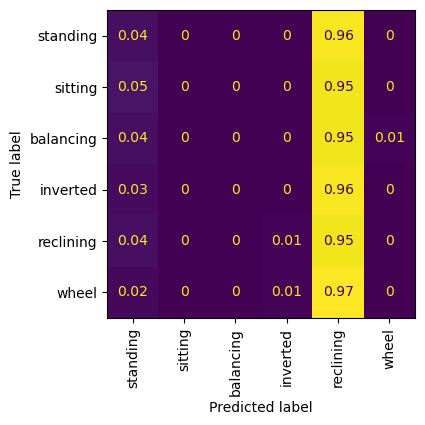

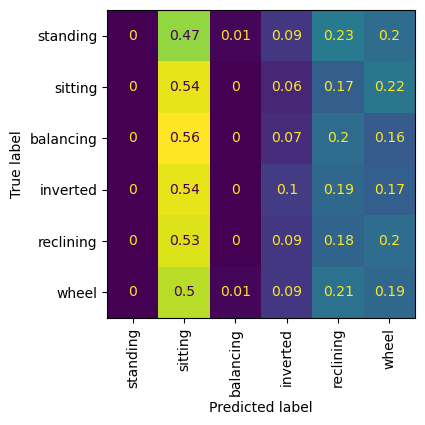

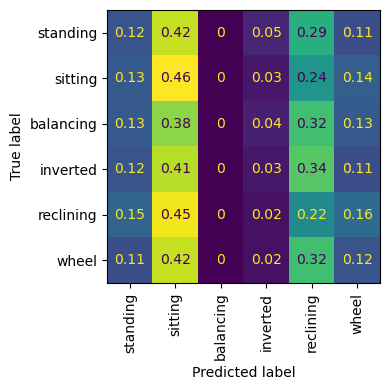

In [35]:
plt.rcParams["figure.figsize"] = (4,4)
#fig, ax = plt.subplots(1,3)


disp = ConfusionMatrixDisplay(cm6_V1, display_labels=test_labels6_str)
disp.plot(include_values=True, cmap="viridis", xticks_rotation="vertical", colorbar=False)

disp = ConfusionMatrixDisplay(cm6_V2, display_labels=test_labels6_str)
disp.plot(include_values=True, cmap="viridis", xticks_rotation="vertical", colorbar=False)


disp = ConfusionMatrixDisplay(cm6_V3, display_labels=test_labels6_str)
disp.plot(include_values=True, cmap="viridis", xticks_rotation="vertical", colorbar=False)

plt.tight_layout()

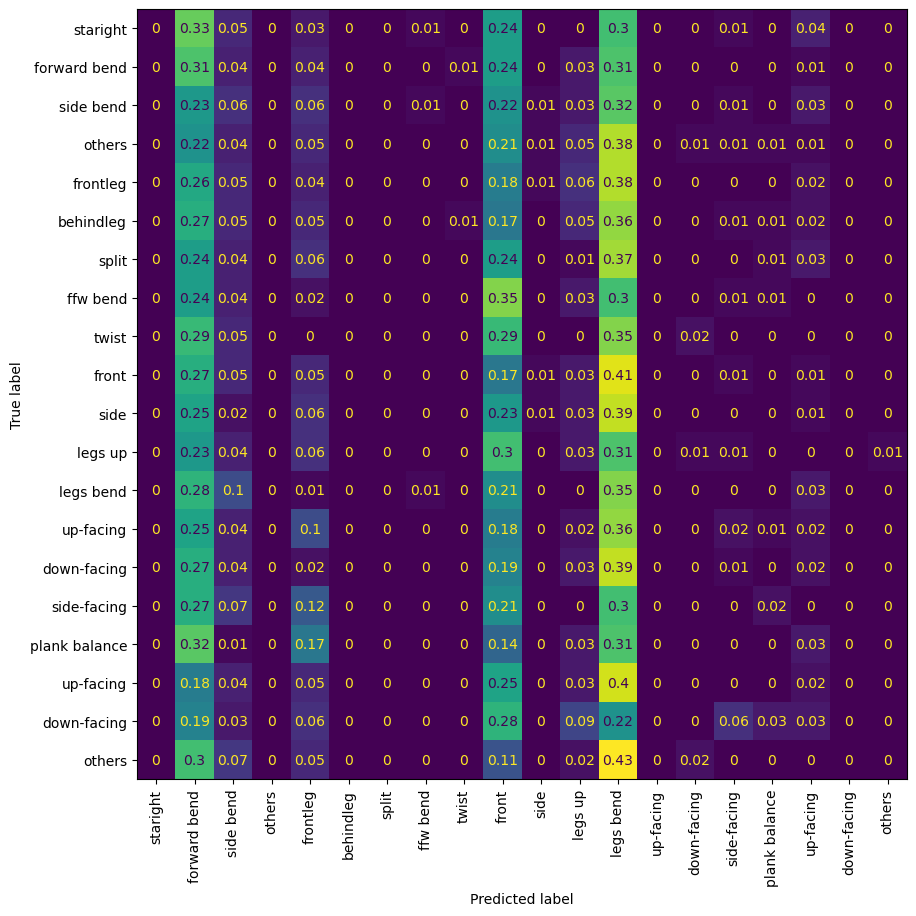

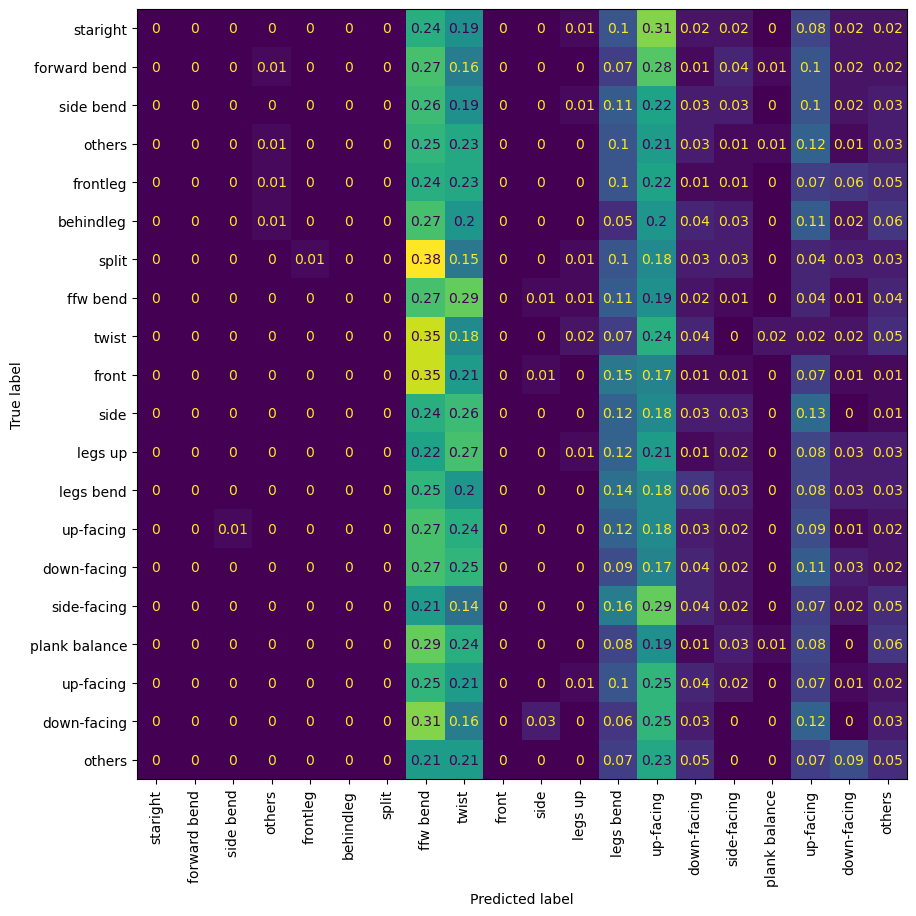

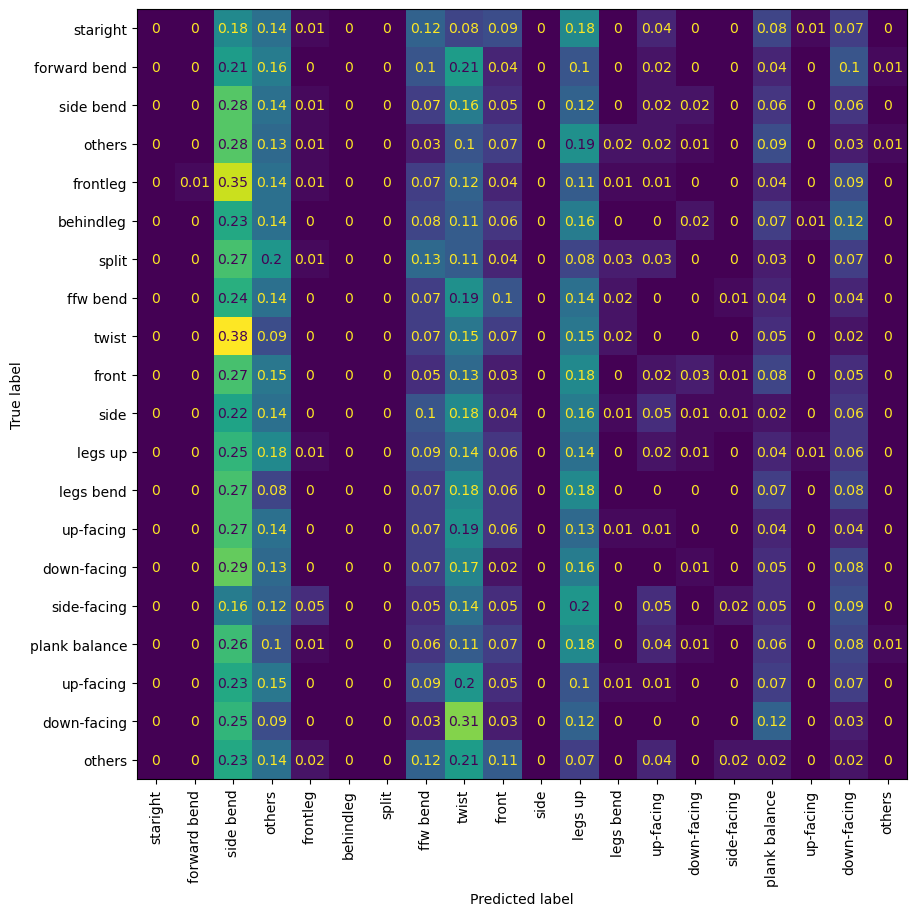

In [36]:
plt.rcParams["figure.figsize"] = (10,10)

disp = ConfusionMatrixDisplay(cm20_V1, display_labels=test_labels20_str)
disp.plot(include_values=True, cmap="viridis", xticks_rotation="vertical", colorbar=False)

disp = ConfusionMatrixDisplay(cm20_V2, display_labels=test_labels20_str)
disp.plot(include_values=True, cmap="viridis", xticks_rotation="vertical", colorbar=False)

disp = ConfusionMatrixDisplay(cm20_V3, display_labels=test_labels20_str)
disp.plot(include_values=True, cmap="viridis", xticks_rotation="vertical", colorbar=False)

#plt.tight_layout()

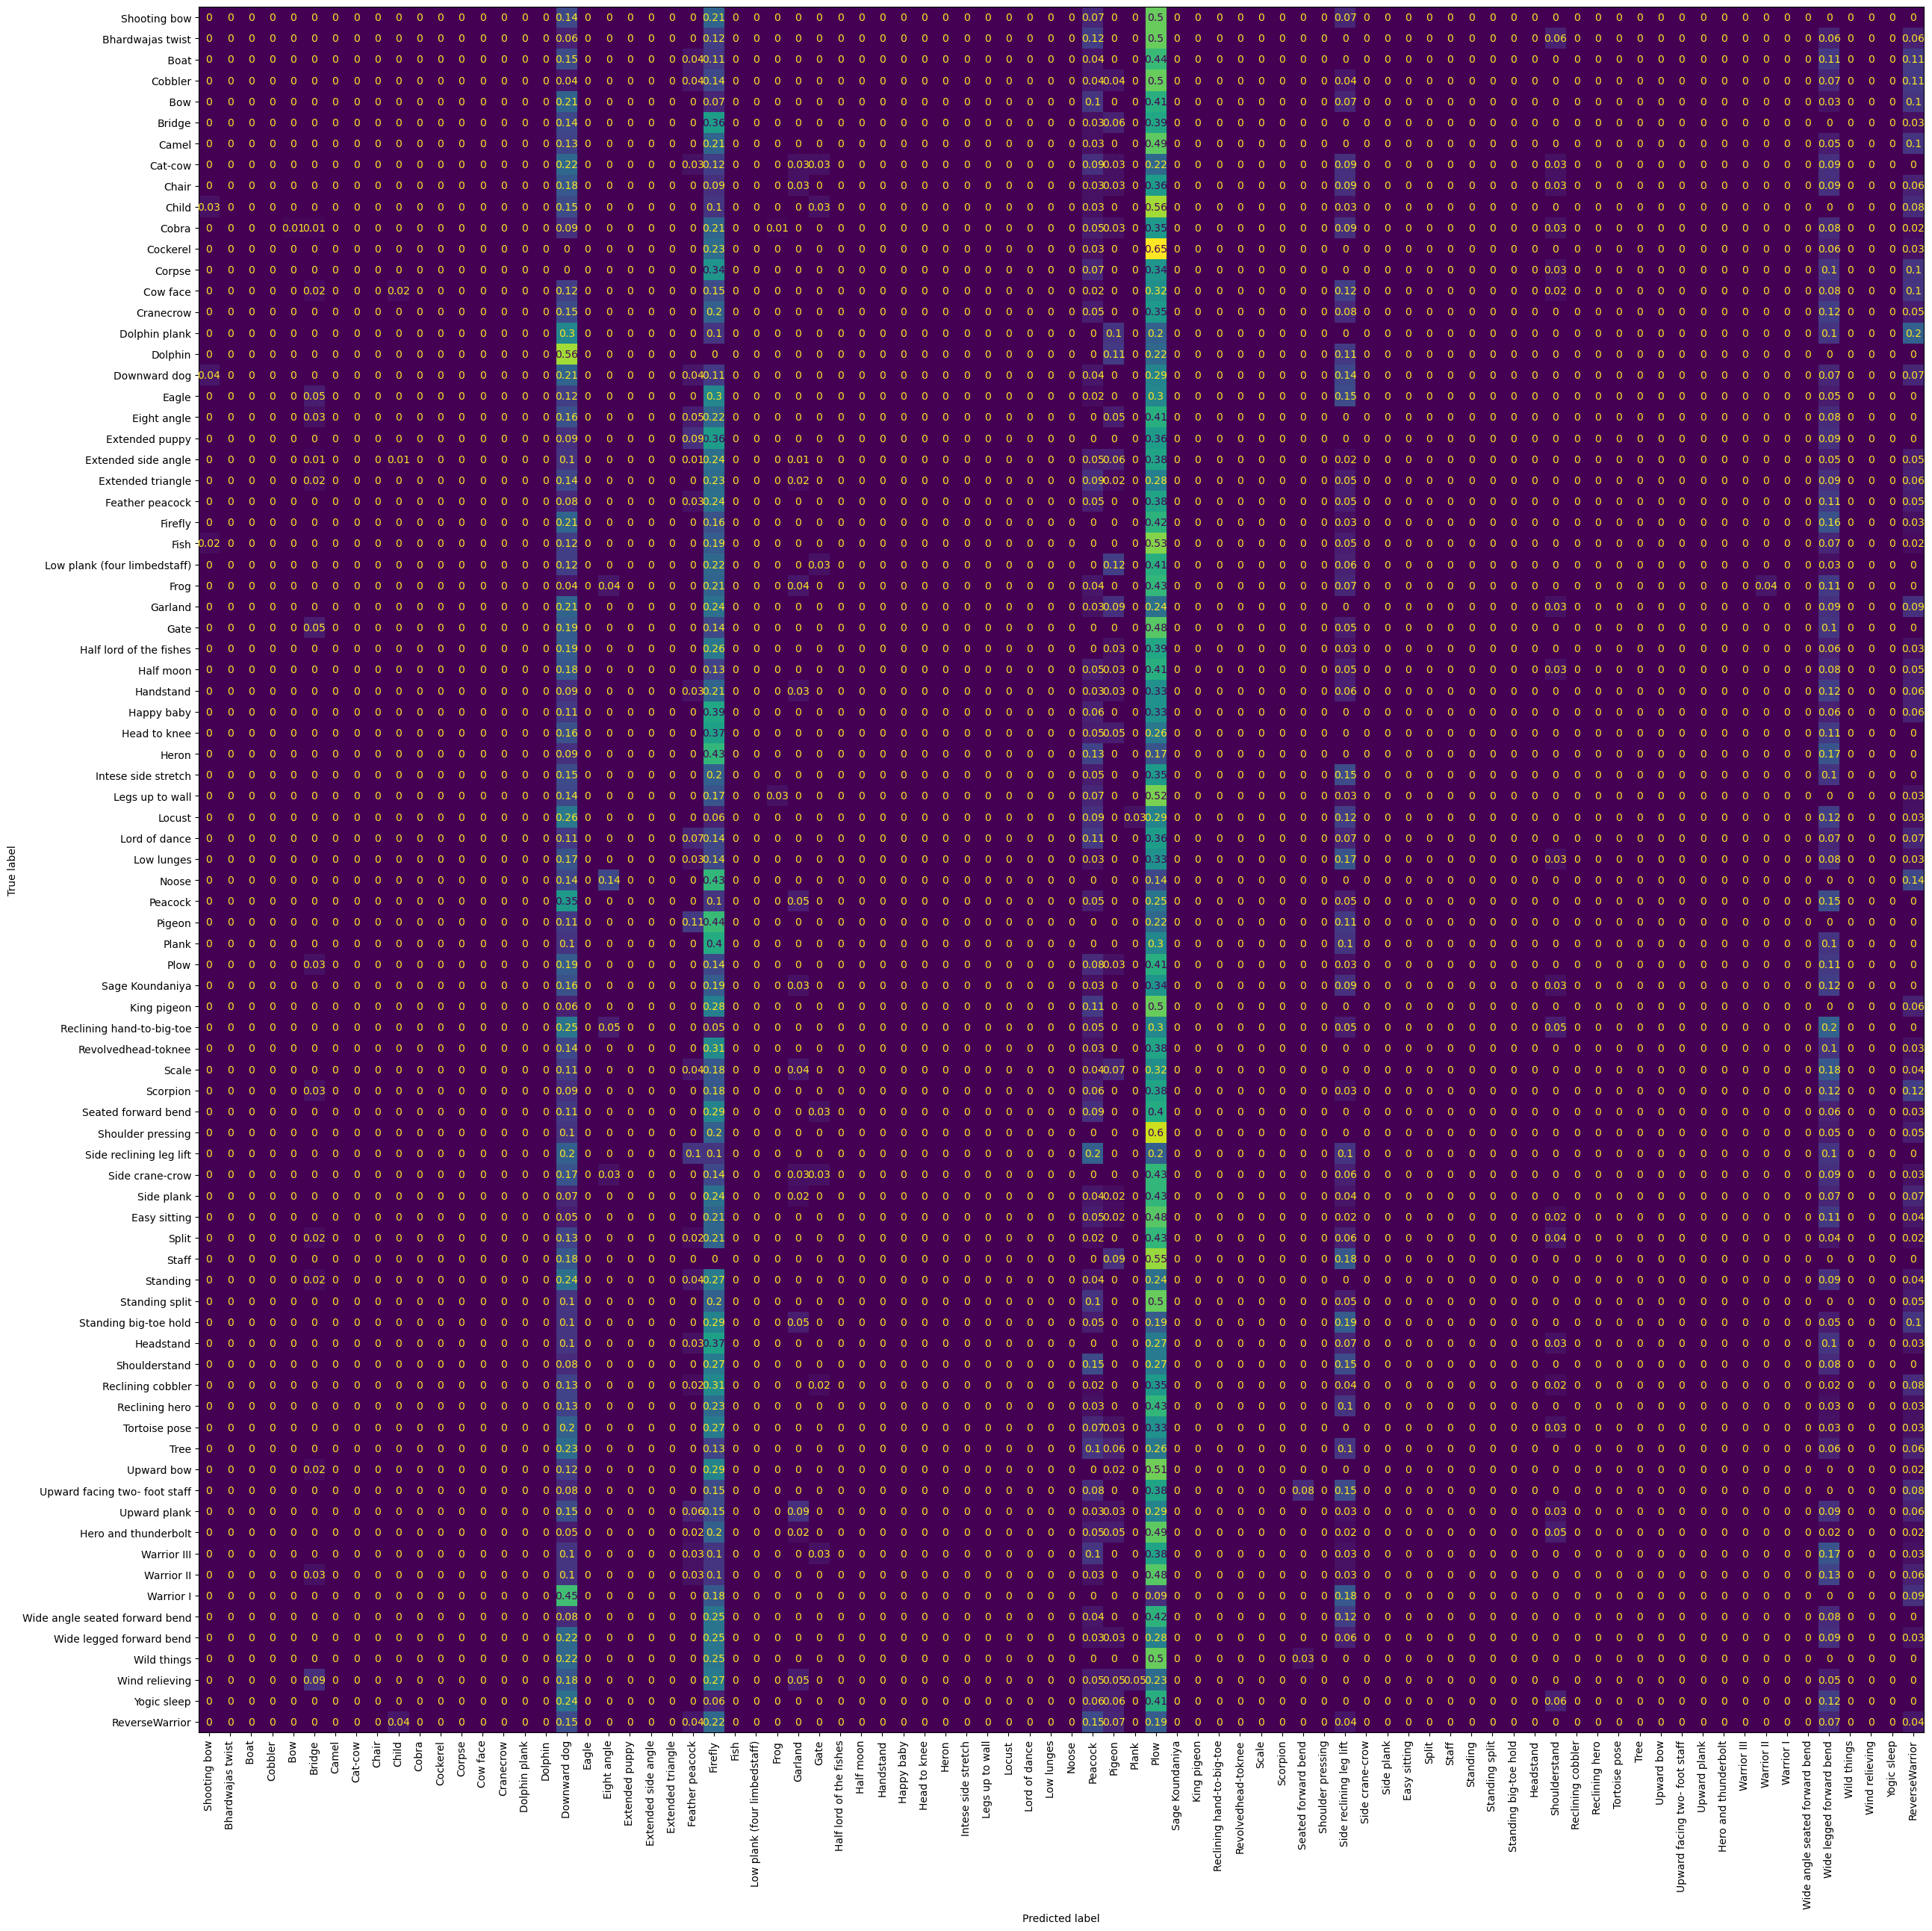

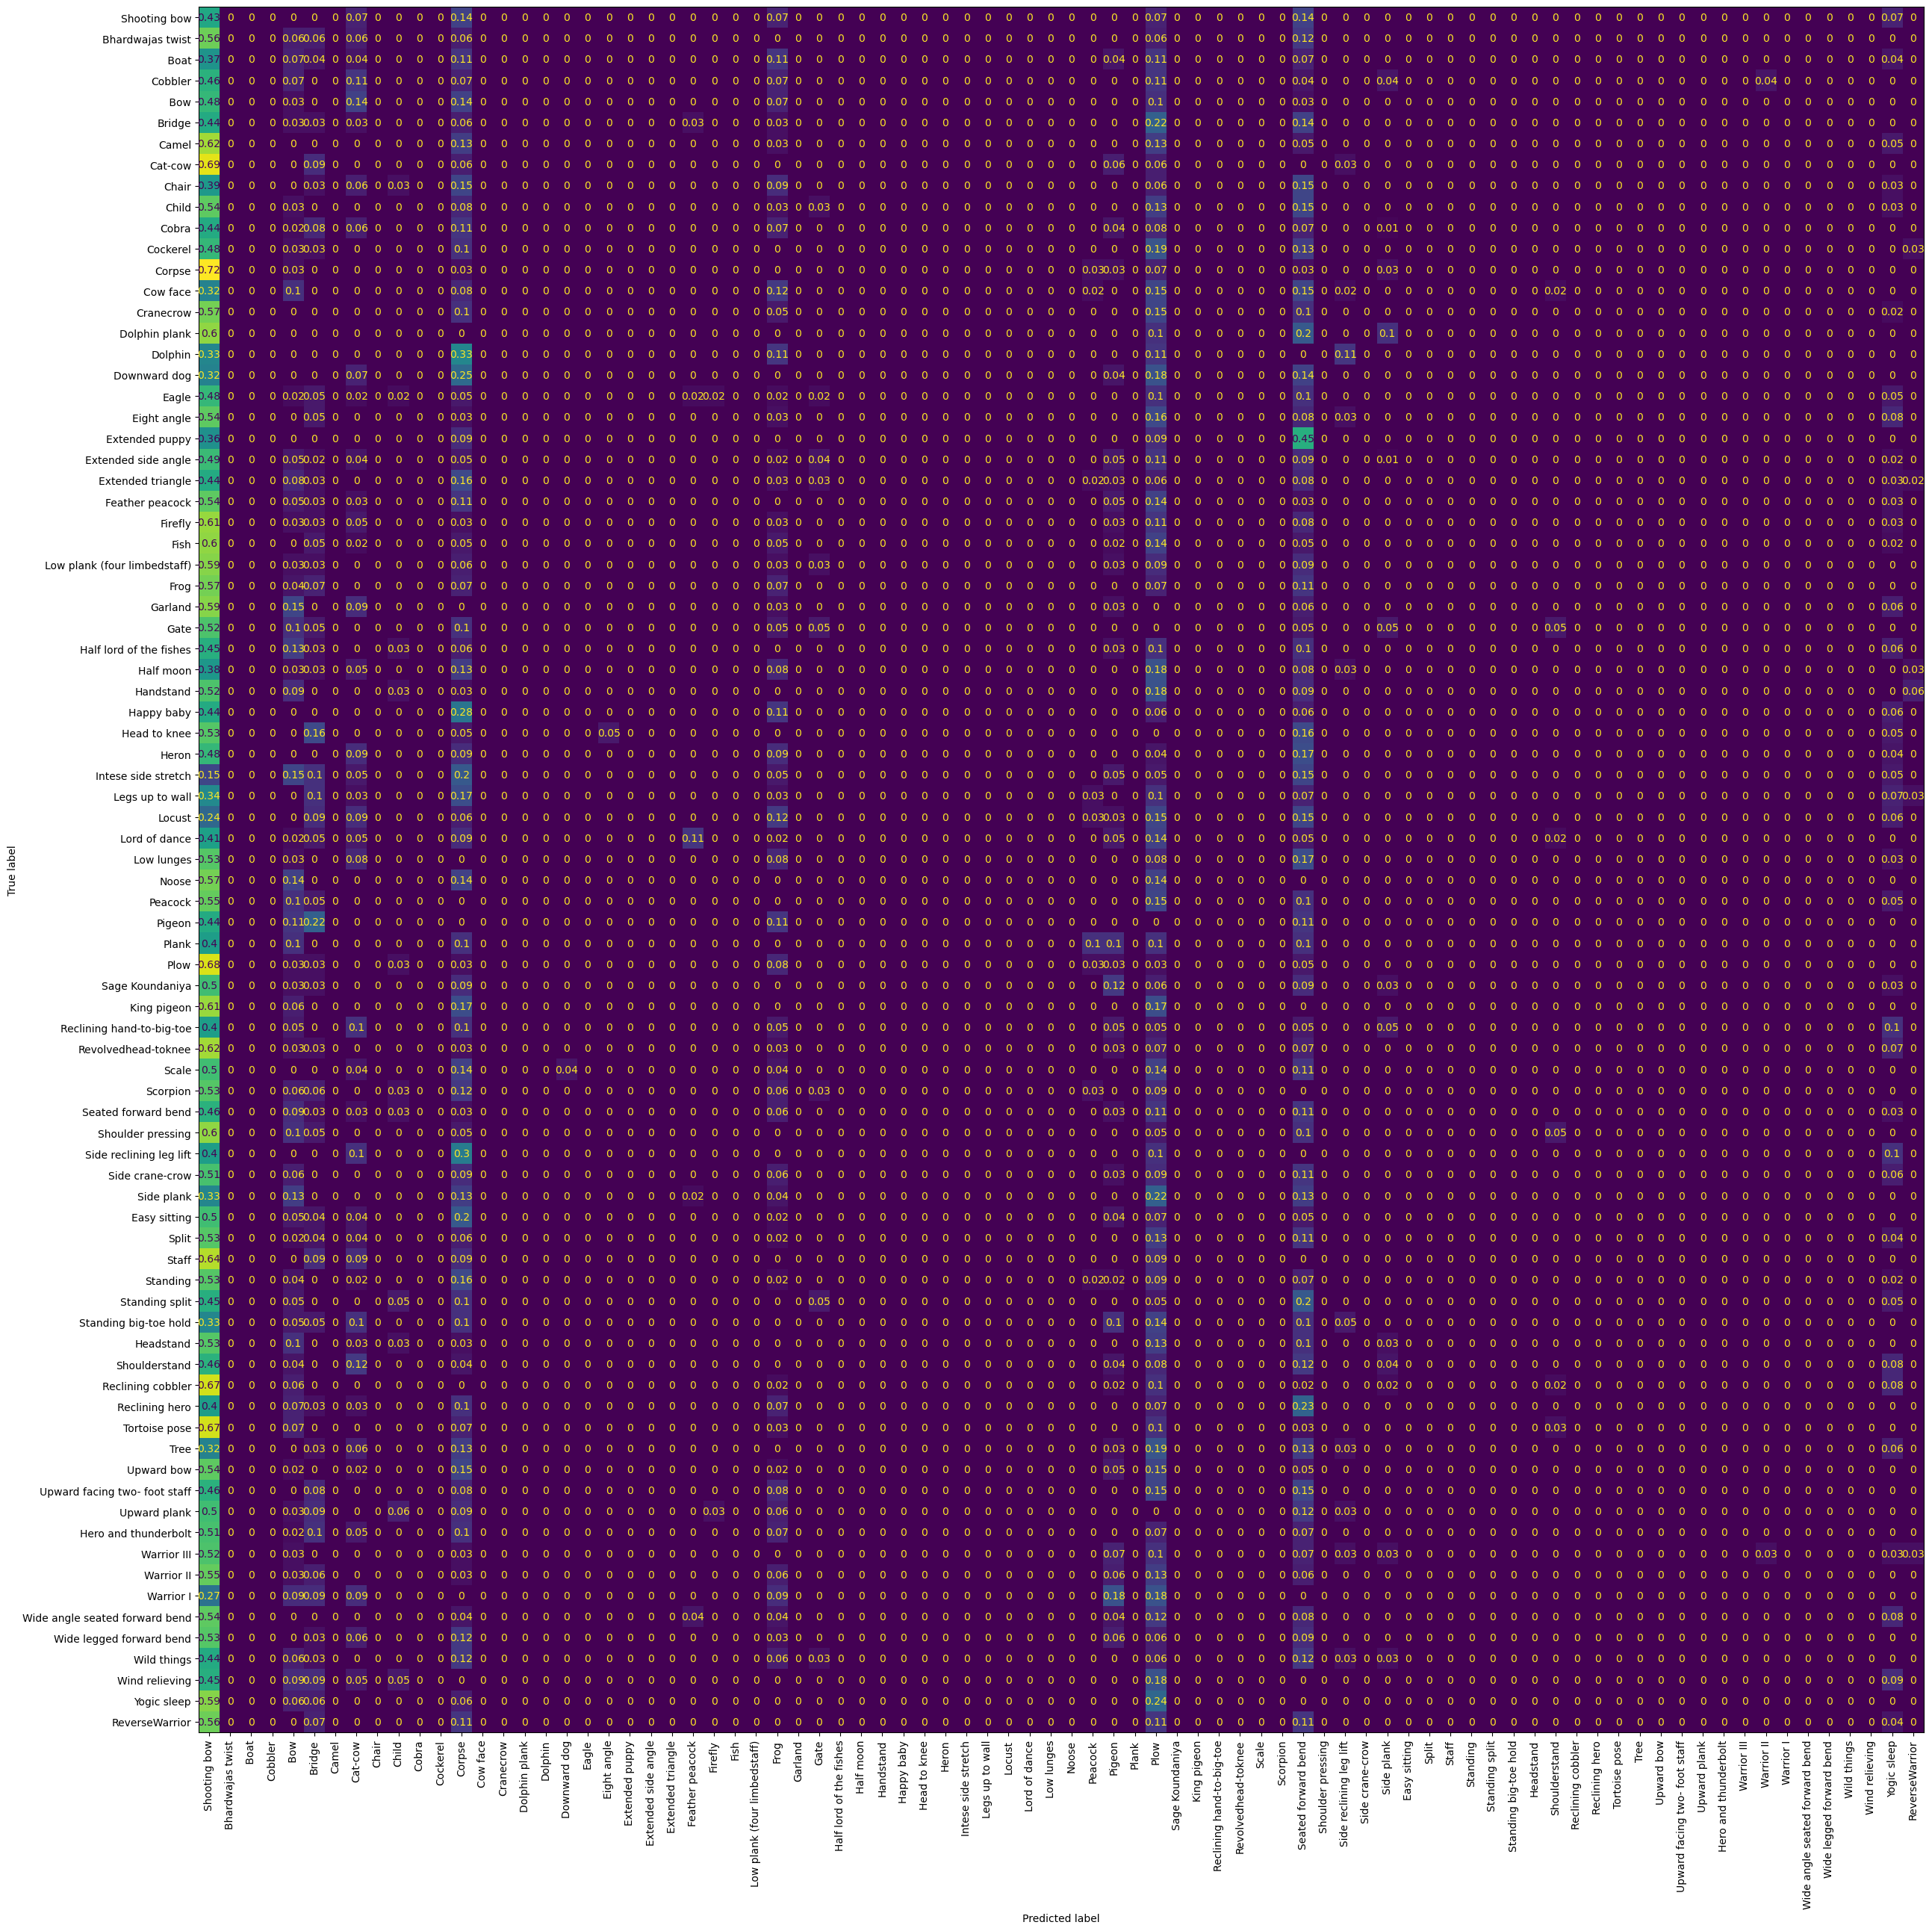

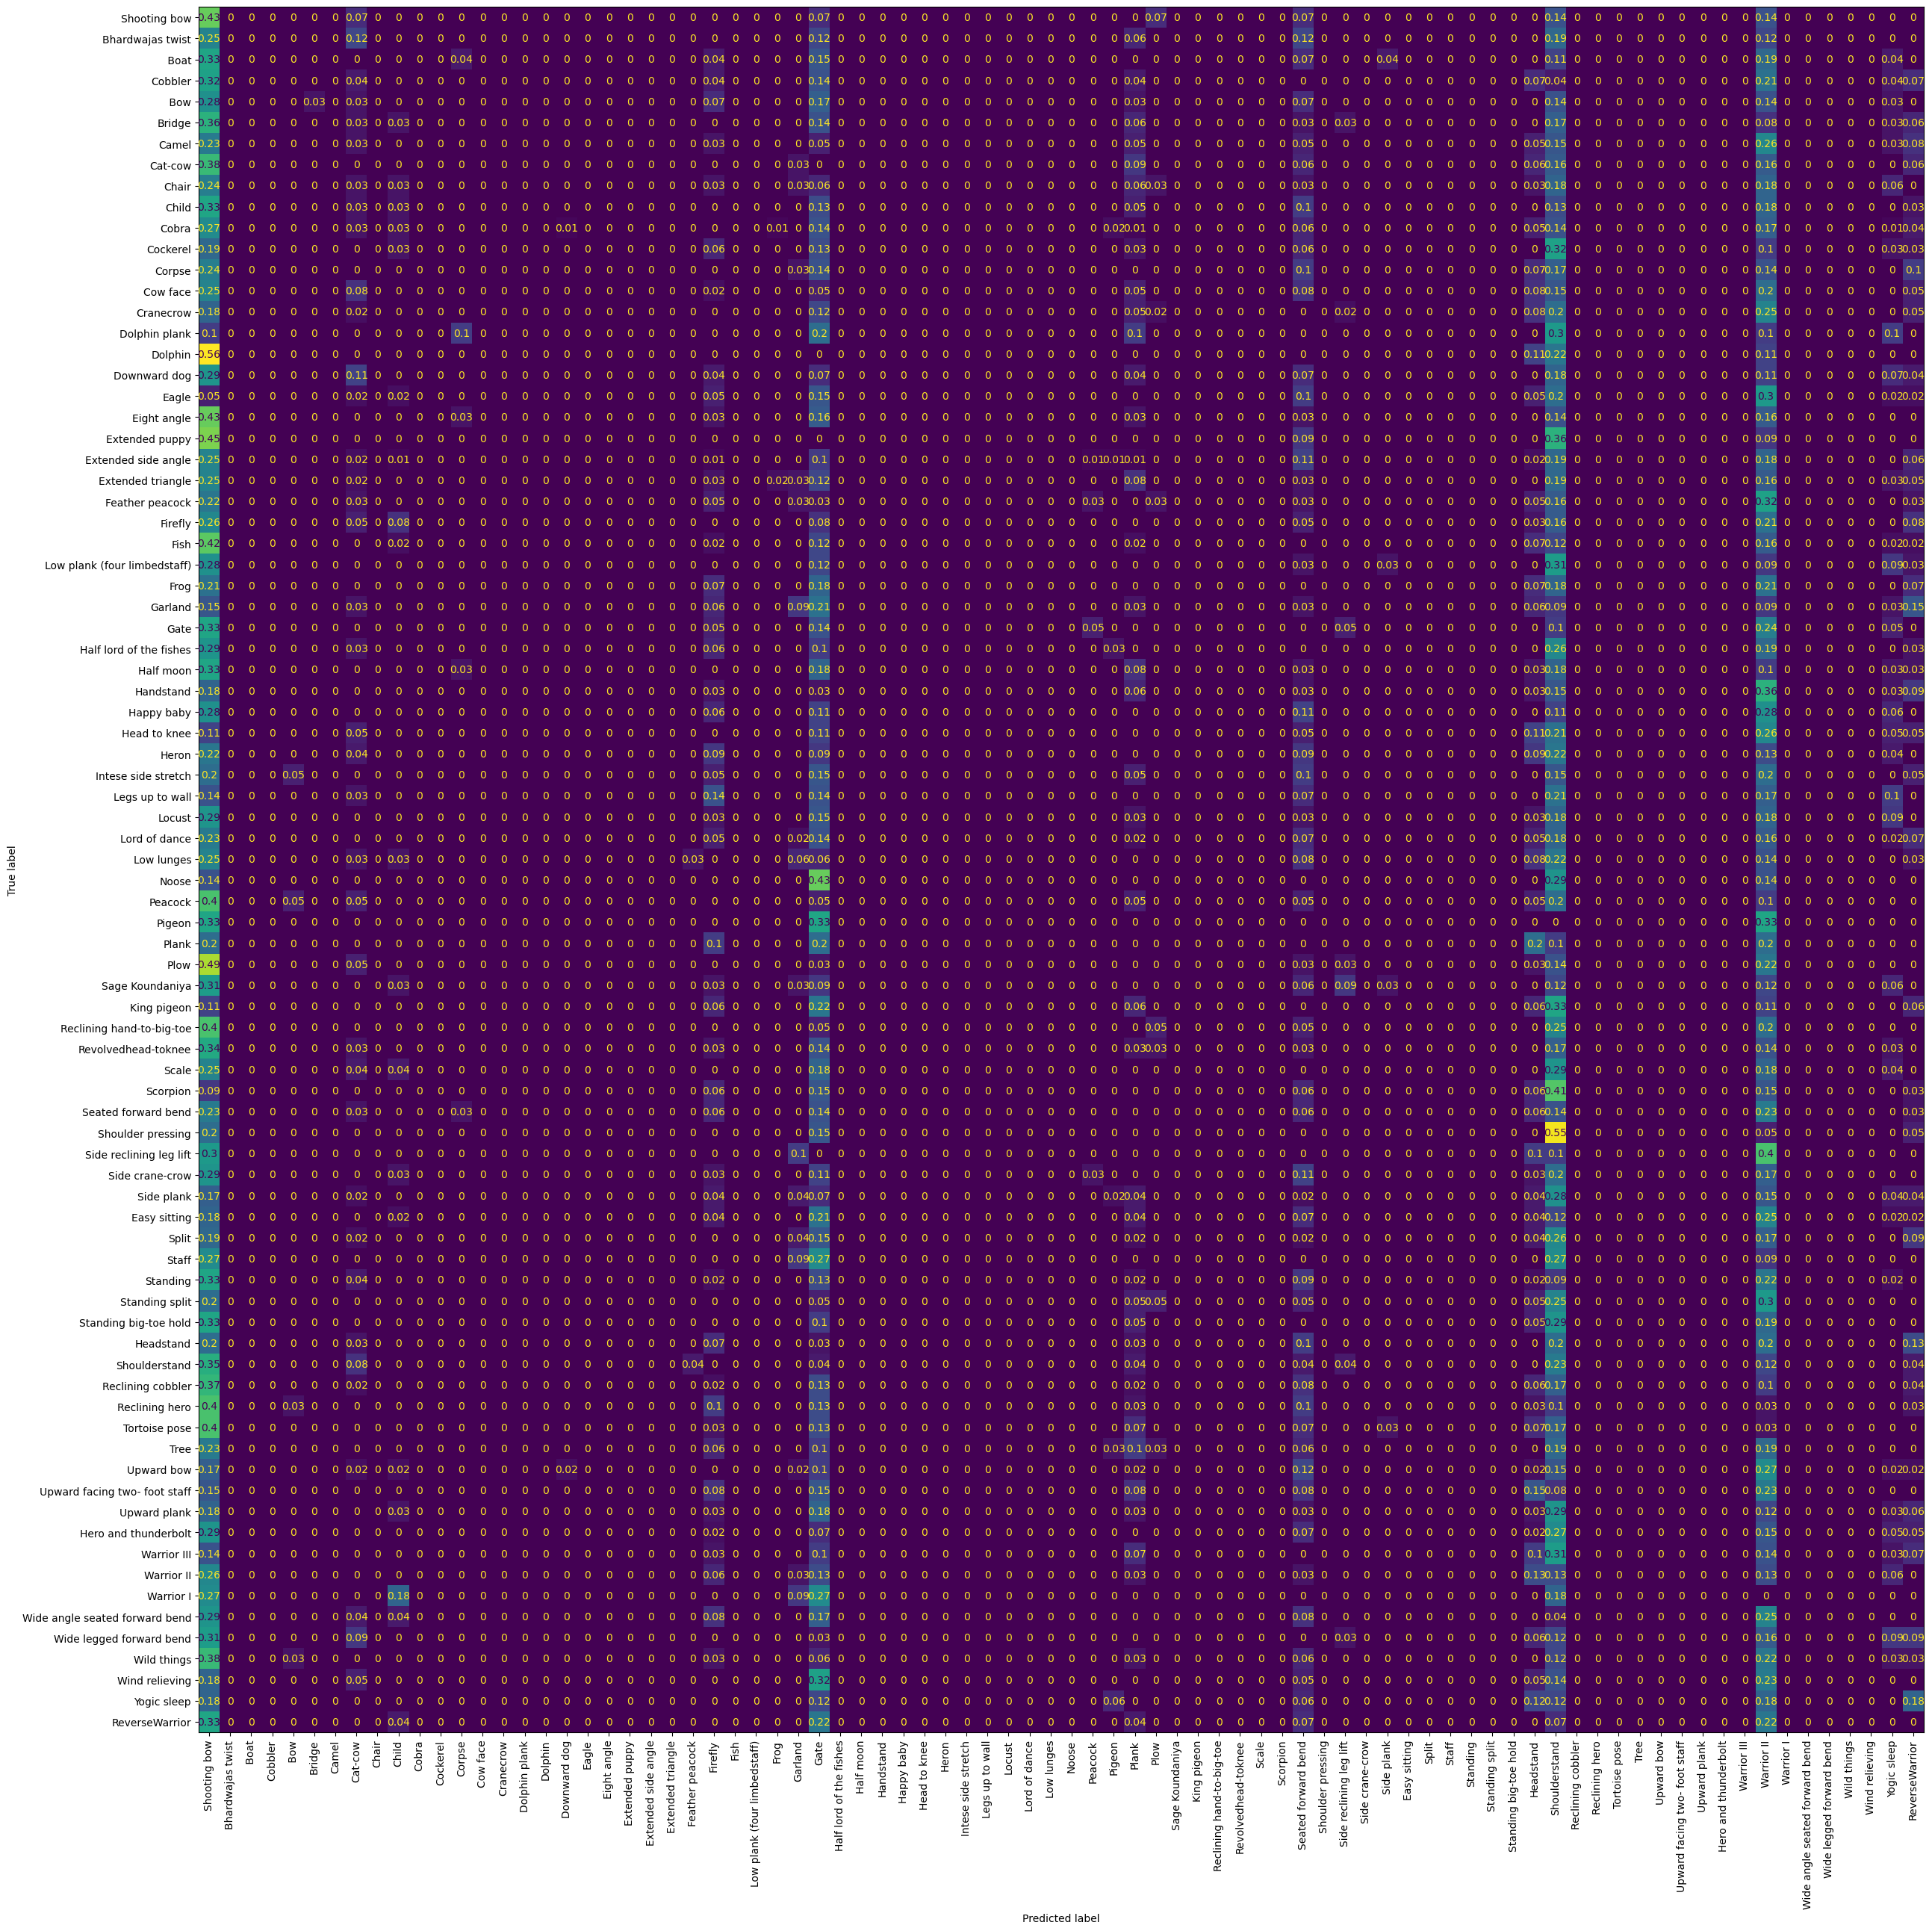

In [37]:
plt.rcParams["figure.figsize"] = (30,30)

disp = ConfusionMatrixDisplay(cm82_V1, display_labels=test_labels82_str)
disp.plot(ax=None, include_values=True, cmap="viridis", xticks_rotation="vertical", colorbar=False)

disp = ConfusionMatrixDisplay(cm82_V2, display_labels=test_labels82_str)
disp.plot(ax=None, include_values=True, cmap="viridis", xticks_rotation="vertical", colorbar=False)

disp = ConfusionMatrixDisplay(cm82_V3, display_labels=test_labels82_str)
disp.plot(ax=None, include_values=True, cmap="viridis", xticks_rotation="vertical", colorbar=False)

# Create tree structured label data

In [31]:
label_df = Train_df.drop(['Unnamed: 0','YogaPoses', 'ImageNumbers', '_merge'], axis=1)
label_df=label_df.replace({"label of class_6": trans6})
label_df=label_df.replace({"label of class_20": trans20})
label_df=label_df.replace({"label of class_82": trans82})
label_df = label_df.drop_duplicates().reset_index(drop=True)
label_df

label of class_6 label of class_20    label of class_82
0          inverted           legs up            Headstand
1          standing          staright                Chair
2          standing          staright                 Tree
3             wheel            others                  Bow
4           sitting          ffw bend  Seated forward bend
..              ...               ...                  ...
77        reclining         up-facing       Reclining hero
78          sitting          ffw bend         Head to knee
79         standing            others       Standing split
80         standing      forward bend              Dolphin
81        reclining       down-facing       Extended puppy

[82 rows x 3 columns]

## Check predictions in Variant1

### Check tree structure

In [32]:
'''CREATE PREDICTED TREE DATA'''
#df_V1 = pd.DataFrame({'predictions6_V1':predictions6_V1, 'predictions20_V1':predictions20_V1, 'predictions82_V1':predictions82_V1})

#df_V1=df_V1.replace({"predictions6_V1": trans6})
#df_V1=df_V1.replace({"predictions20_V1": trans20})
#df_V1=df_V1.replace({"predictions82_V1": trans82})
#df_V11 = df_V1.drop_duplicates().reset_index(drop=True)
#print(df_V11)

'CREATE PREDICTED TREE DATA'

In [33]:
#unique predictions - How many classes were predicted per level?
#print (df_V1['predictions6_V1'].str.split(';\s*', expand=True).stack().unique())
#print (df_V1['predictions20_V1'].str.split(';\s*', expand=True).stack().unique())
#print (df_V1['predictions82_V1'].str.split(';\s*', expand=True).stack().unique())

### List which path could follow the label structure

#### all 3 level

In [34]:
'''WHICH PREDICTION FOLLOWED THE TREE'''
#check_df = df_V11.rename(columns={'predictions6_V1': 'label of class_6','predictions20_V1': 'label of class_20', 'predictions82_V1': 'label of class_82'})
#keys = list(label_df.columns.values)

#i1 = check_df.set_index(keys).index
#i2 = label_df.set_index(keys).index
#not followed
#check_df[~i1.isin(i2)]
#followed
#check_df[i1.isin(i2)]

'WHICH PREDICTION FOLLOWED THE TREE'

#### first 2 level

In [35]:
'''check 2 combination '''
#check_df = df_V11.rename(columns={'predictions6_V1': 'label of class_6','predictions20_V1': 'label of class_20', 'predictions82_V1': 'label of class_82'})
#check_df = check_df.drop(['label of class_82'], axis=1)
#label_df = label_df.drop(['label of class_82'], axis=1)
#keys = list(label_df.columns.values)

#i1 = check_df.set_index(keys).index
#i2 = label_df.set_index(keys).index
#not followed
#check_df[~i1.isin(i2)]
#followed
#check_df[i1.isin(i2)]

'check 2 combination '

#### last 2 level

## Check predictions in Variant2

### Check tree structure

In [36]:
'''Ground truth'''
TestCheck_df = Test_df.drop(['Unnamed: 0', 'YogaPoses', '_merge'], axis=1) 
TestCheck_df = TestCheck_df.replace({"label of class_6": trans6})
TestCheck_df = TestCheck_df.replace({"label of class_20": trans20})
TestCheck_df = TestCheck_df.replace({"label of class_82": trans82})

#print(TestCheck_df.head())

'''Predictions'''
df_V2 = pd.DataFrame({'predictions6_V2':predictions6_V2, 'predictions20_V2':predictions20_V2, 'predictions82_V2':predictions82_V2})
df_V2=df_V2.replace({"predictions6_V2": trans6})
df_V2=df_V2.replace({"predictions20_V2": trans20})
df_V2=df_V2.replace({"predictions82_V2": trans82})
df_V2 = df_V2.rename(columns={'predictions6_V2': 'label of class_6','predictions20_V2': 'label of class_20', 'predictions82_V2': 'label of class_82'})
df_V2['ImageNumbers'] = TestCheck_df['ImageNumbers']
cols = list(df_V2.columns)
cols = [cols[-1]] + cols[:-1]
df_V2 = df_V2[cols]
#print(df_V2.head())

Results_df = pd.merge(df_V2, TestCheck_df, left_index=True, right_index=True)#.drop('id1', axis=1)
Results_df = Results_df.rename(columns={'label of class_6_x' :'predicted 6',
                                        'label of class_20_x' :'predicted 20',
                                        'label of class_82_x':'predicted 82',
                                        'label of class_6_y':'true 6',
                                        'label of class_20_y':'true 20', 
                                        'label of class_82_y':'true 82',
                                        'ImageNumbers_x':'ImageNumbers'}).drop(['ImageNumbers_y'], axis=1)
Results_df

ImageNumbers predicted 6 predicted 20       predicted 82     true 6  \
0         257.jpg     sitting        twist               Boat    sitting   
1       0_419.jpg   balancing        front            Firefly    sitting   
2         387.jpg    standing    side bend          Half moon   standing   
3       0_340.jpg       wheel    up-facing             Bridge      wheel   
4       1_105.jpg    inverted      legs up     Standing split   standing   
...           ...         ...          ...                ...        ...   
4536    1_101.jpg    inverted    legs bend           Scorpion   inverted   
4537    1_274.jpg    standing    side bend  Extended triangle   standing   
4538    3_192.jpg   reclining    up-facing               Fish  reclining   
4539    0_362.jpg   balancing        front          Cranecrow  balancing   
4540    1_523.jpg    inverted      legs up    Legs up to wall    sitting   

        true 20            true 82  
0      frontleg            Garland  
1      frontleg            Garland  
2     side bend          Half moon  
3     up-facing             Bridge  
4        others     Standing split  
...         ...                ...  
4536  legs bend           Scorpion  
4537  side bend  Extended triangle  
4538  up-facing  Reclining cobbler  
4539      front            Firefly  
4540   frontleg            Cobbler  

[4541 rows x 7 columns]

In [37]:
'''COMPARE'''  
'''BLACK IS PREDICTED RIGHT'''
TestCheck_df = TestCheck_df.rename(columns={'label of class_6' :'predicted 6',
                                        'label of class_20' :'predicted 20',
                                        'label of class_82':'predicted 82'})
TestCheck_df['true 6'] = TestCheck_df['predicted 6']
TestCheck_df['true 20'] = TestCheck_df['predicted 20']
TestCheck_df['true 82'] = TestCheck_df['predicted 82']
#print(TestCheck_df.head())


compare = TestCheck_df.compare(Results_df, keep_shape=True).drop('other', level=1, axis=1)
compare = compare.droplevel(1, axis=1).dropna(how='all')
filtered = Results_df.loc[compare.index]
def color_cells(s):
    if pd.notna(s):
        return 'color:{0}; font-weight:bold'.format('orange')
    else:
        return ''

Compared_df = filtered.style.apply(lambda x: compare.applymap(color_cells), axis=None)
Compared_df

In [38]:
df_V2 = pd.DataFrame({'predictions6_V2':predictions6_V2, 'predictions20_V2':predictions20_V2, 'predictions82_V2':predictions82_V2})
df_V2=df_V2.replace({"predictions6_V2": trans6})
df_V2=df_V2.replace({"predictions20_V2": trans20})
df_V2=df_V2.replace({"predictions82_V2": trans82})
df_V11 = df_V2.drop_duplicates().reset_index(drop=True)
print(df_V2)

     predictions6_V2 predictions20_V2   predictions82_V2
0            sitting            twist               Boat
1          balancing            front            Firefly
2           standing        side bend          Half moon
3              wheel        up-facing             Bridge
4           inverted          legs up     Standing split
...              ...              ...                ...
4536        inverted        legs bend           Scorpion
4537        standing        side bend  Extended triangle
4538       reclining        up-facing               Fish
4539       balancing            front          Cranecrow
4540        inverted          legs up    Legs up to wall

[4541 rows x 3 columns]


In [39]:
print('How many classes were predicted per level?')
print(len(df_V2['predictions6_V2'].str.split(';\s*', expand=True).stack().unique()), '/6')
print(len(df_V2['predictions20_V2'].str.split(';\s*', expand=True).stack().unique()), '/20')
print(len(df_V2['predictions82_V2'].str.split(';\s*', expand=True).stack().unique()), '/82')

How many classes were predicted per level?
6 /6
17 /20
82 /82


### List which path could follow the label structure

#### all 3 level

In [40]:
df_V2.shape[0]

4541

In [41]:
'''check 2 combination '''
check_df = df_V11.rename(columns={'predictions6_V2': 'label of class_6','predictions20_V2': 'label of class_20', 'predictions82_V2': 'label of class_82'})
keys = list(label_df.columns.values)

i1 = check_df.set_index(keys).index
i2 = label_df.set_index(keys).index
#not followed
check_df[~i1.isin(i2)]
#followed
#check_df[i1.isin(i2)]

label of class_6 label of class_20 label of class_82
0            sitting             twist              Boat
4           inverted           legs up    Standing split
10         reclining         up-facing             Split
21           sitting          ffw bend             Child
25           sitting         up-facing           Garland
..               ...               ...               ...
548        reclining          frontleg             Cobra
549        balancing             front          Scorpion
550         standing         side bend             Plank
551         standing            others         Warrior I
552         standing         up-facing        Warrior II

[471 rows x 3 columns]

#### first 2 level

In [42]:
'''check 2 combination '''
check_df = df_V11.rename(columns={'predictions6_V2': 'label of class_6','predictions20_V2': 'label of class_20', 'predictions82_V2': 'label of class_82'})
#check_df = check_df.drop(['label of class_82'], axis=1)
#label_df = label_df.drop(['label of class_82'], axis=1)
keys = list(label_df.columns.values)

i1 = check_df.set_index(keys).index
i2 = label_df.set_index(keys).index
#not followed
check_df[~i1.isin(i2)]
#followed
#check_df[i1.isin(i2)]

label of class_6 label of class_20 label of class_82
0            sitting             twist              Boat
4           inverted           legs up    Standing split
10         reclining         up-facing             Split
21           sitting          ffw bend             Child
25           sitting         up-facing           Garland
..               ...               ...               ...
548        reclining          frontleg             Cobra
549        balancing             front          Scorpion
550         standing         side bend             Plank
551         standing            others         Warrior I
552         standing         up-facing        Warrior II

[471 rows x 3 columns]

#### last 2 level

## Check predictions in Variant 3

### Check all sample match

In [43]:
'''Ground truth'''
PerfectTestCheck_df = PerfectTest_df.drop(['Unnamed: 0', 'YogaPoses', '_merge'], axis=1) 
PerfectTestCheck_df = PerfectTestCheck_df.replace({"label of class_6": trans6})
PerfectTestCheck_df = PerfectTestCheck_df.replace({"label of class_20": trans20})
PerfectTestCheck_df = PerfectTestCheck_df.replace({"label of class_82": trans82})
#PerfectTestCheck_df

'''Predictions'''
df_V3 = pd.DataFrame({'predictions6_V3':predictions6_V3, 'predictions20_V3':predictions20_V3, 'predictions82_V3':predictions82_V3})
df_V3=df_V3.replace({"predictions6_V3": trans6})
df_V3=df_V3.replace({"predictions20_V3": trans20})
df_V3=df_V3.replace({"predictions82_V3": trans82})
df_V3 = df_V3.rename(columns={'predictions6_V3': 'label of class_6','predictions20_V3': 'label of class_20', 'predictions82_V3': 'label of class_82'})
df_V3['ImageNumbers'] = PerfectTestCheck_df['ImageNumbers']
cols = list(df_V3.columns)
cols = [cols[-1]] + cols[:-1]
df_V3 = df_V3[cols]
#df_V3


'''COMPARE'''  
'''BLACK IS PREDICTED RIGHT'''
compare = PerfectTestCheck_df.compare(df_V3, keep_shape=True).drop('other', level=1, axis=1)
compare = compare.droplevel(1, axis=1).dropna(how='all')
filtered = PerfectTestCheck_df.loc[compare.index]
def color_cells(s):
    if pd.notna(s):
        return 'color:{0}; font-weight:bold'.format('orange')
    else:
        return ''

Compared_df = filtered.style.apply(lambda x: compare.applymap(color_cells), axis=None)
Compared_df.head()

NameError: name 'PerfectTest_df' is not defined

### Check tree structure

In [44]:
#predicted combinations
df_V11 = df_V3.drop(['ImageNumbers'], axis=1).drop_duplicates().reset_index(drop=True)
#print(df_V11)

NameError: name 'df_V3' is not defined

In [45]:
#unique predictions - How many classes were predicted per level?
print (df_V3['label of class_6'].str.split(';\s*', expand=True).stack().unique())
print (df_V3['label of class_20'].str.split(';\s*', expand=True).stack().unique())
print (df_V3['label of class_82'].str.split(';\s*', expand=True).stack().unique())

NameError: name 'df_V3' is not defined

### List which path could follow the label structure

#### all 3 level

In [46]:
'''check 2 combination '''
check_df = df_V11#.rename(columns={'predictions6_V3': 'label of class_6','predictions20_V3': 'label of class_20', 'predictions82_V3': 'label of class_82'})
label_df = PerfectTestCheck_df.drop(['ImageNumbers'], axis=1)
keys = list(label_df.columns.values)

i1 = check_df.set_index(keys).index
i2 = label_df.set_index(keys).index
#print(i2)
#followed
check_df[i1.isin(i2)]

NameError: name 'PerfectTestCheck_df' is not defined

In [47]:
x = df_V3.loc[(df_V3['label of class_6'] == 'sitting') & (df_V3['label of class_20'] == 'behindleg') & (df_V3['label of class_82'] == 'Bhardwajas twist')]
finding = x[~x.isnull().any(axis=1)]
#finding

y = PerfectTestCheck_df.loc[(PerfectTestCheck_df['label of class_6'] == 'sitting') & (PerfectTestCheck_df['label of class_20'] == 'behindleg') & (PerfectTestCheck_df['label of class_82'] == 'Bhardwajas twist')]
finding2 = y[~y.isnull().any(axis=1)]
finding2
#???????????????????????????????????????????????????????????+  TRY TO FIND THE RIGHT CLASSIFIED PICTURE

NameError: name 'df_V3' is not defined

In [48]:
df = pd.merge(finding, finding2, on=['ImageNumbers', 'label of class_6', 'label of class_20', 'label of class_82'])
df

NameError: name 'finding' is not defined

In [49]:
#Image(filename='../data/Yoga-82/YOGA_downloads/Bharadvaja's_Twist_pose_or_Bharadvajasana_I_/40.jpg') 

In [50]:
PerfectTestCheck_df.loc[PerfectTestCheck_df['ImageNumbers'] == '40.jpg']

NameError: name 'PerfectTestCheck_df' is not defined

In [51]:
'''
compared_df = PerfectTestCheck_df.compare(finding, keep_shape=True).drop('other', level=1, axis=1)
compared_df = compared_df.droplevel(1, axis=1).dropna(how='all')
filtered = PerfectTestCheck_df.loc[compare.index]
def color_cells(s):
    if pd.notna(s):
        return 'color:{0}; font-weight:bold'.format('orange')
    else:
        return ''

Compared_df = filtered.style.apply(lambda x: compare.applymap(color_cells), axis=None)
Compared_df'''

"\ncompared_df = PerfectTestCheck_df.compare(finding, keep_shape=True).drop('other', level=1, axis=1)\ncompared_df = compared_df.droplevel(1, axis=1).dropna(how='all')\nfiltered = PerfectTestCheck_df.loc[compare.index]\ndef color_cells(s):\n    if pd.notna(s):\n        return 'color:{0}; font-weight:bold'.format('orange')\n    else:\n        return ''\n\nCompared_df = filtered.style.apply(lambda x: compare.applymap(color_cells), axis=None)\nCompared_df"

#### first 2 level

In [52]:
'''check 2 combination '''
check_df = df_V11.rename(columns={'predictions6_V3': 'label of class_6','predictions20_V3': 'label of class_20', 'predictions82_V3': 'label of class_82'})
check_df = check_df.drop(['label of class_82'], axis=1)
#label_df = label_df.drop(['label of class_82'], axis=1)
keys = list(label_df.columns.values)

i1 = check_df.set_index(keys).index
i2 = label_df.set_index(keys).index
#not followed
check_df[~i1.isin(i2)]
##followed
#check_df[i1.isin(i2)]

KeyError: "['label of class_82'] not found in axis"

#### last 2 level

In [53]:
keys = list(label_df.columns.values)
i1 = check_df.set_index(keys).index
i2 = label_df.set_index(keys).index
check_df[~i1.isin(i2)]

KeyError: "None of ['label of class_6', 'label of class_20', 'label of class_82'] are in the columns"